In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/signaturesigcomp/all/train/fake/0116007_5.png
/kaggle/input/signaturesigcomp/all/train/fake/0109004_6.png
/kaggle/input/signaturesigcomp/all/train/fake/0103002_6.png
/kaggle/input/signaturesigcomp/all/train/fake/0110005_7.png
/kaggle/input/signaturesigcomp/all/train/fake/0111010_2.png
/kaggle/input/signaturesigcomp/all/train/fake/0116001_2.png
/kaggle/input/signaturesigcomp/all/train/fake/0116008_7.png
/kaggle/input/signaturesigcomp/all/train/fake/0103002_11.png
/kaggle/input/signaturesigcomp/all/train/fake/0110009_6.png
/kaggle/input/signaturesigcomp/all/train/fake/0113009_4.png
/kaggle/input/signaturesigcomp/all/train/fake/0108008_10.png
/kaggle/input/signaturesigcomp/all/train/fake/0116002_11.png
/kaggle/input/signaturesigcomp/all/train/fake/0113006_5.png
/kaggle/input/signaturesigcomp/all/train/fake/0113001_5.png
/kaggle/input/signaturesigcomp/all/train/fake/0108008_9.png
/kaggle/input/signaturesigcomp/all/train/fake/0113001_9.png
/kaggle/input/signaturesigcomp/all/tr

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import  MaxPool2D 
from tensorflow.keras.applications.vgg16 import VGG16 
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.resnet50 import  ResNet50

#from tensorflow.keras import backend as K
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator #, img_to_array, load_img
from tensorflow.keras.models import Sequential, load_model
#from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
#from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.optimizers import Adam , SGD
from tensorflow.keras.applications.inception_v3 import InceptionV3
#import sys
#import csv
import os
#import math
#import json, codecs
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
#from zipfile import ZipFile
import shutil
#from glob import glob
#from PIL import Image
#from PIL import ImageFilter
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

#import torch 
#import torch.nn as nn
#import torch.nn.functional as F
#import time
import cv2 as C
#import h5py

import itertools
from itertools import product
from keras.utils.vis_utils import plot_model

In [3]:
size = 224
Adam = Adam(lr=0.0001)
SGD = SGD(lr=0.001, momentum=0.9)

training_real = [
'/kaggle/input/signaturesigcomp/all/train/real/009_12.png',
'/kaggle/input/signaturesigcomp/all/train/real/004_10.png',
'/kaggle/input/signaturesigcomp/all/train/real/003_18.png',
'/kaggle/input/signaturesigcomp/all/train/real/007_5.png',
'/kaggle/input/signaturesigcomp/all/train/real/003_1.png' ]

training_fake = [
'/kaggle/input/signaturesigcomp/all/train/fake/0103002_6.png',
'/kaggle/input/signaturesigcomp/all/train/fake/0112004_10.png',
'/kaggle/input/signaturesigcomp/all/train/fake/0108008_5.png',
'/kaggle/input/signaturesigcomp/all/train/fake/0109005_9.png',
'/kaggle/input/signaturesigcomp/all/train/fake/0109002_8.png']

testing_real = [
'/kaggle/input/signaturesigcomp/all/test/real/002_5.png',
'/kaggle/input/signaturesigcomp/all/test/real/003_16.png',
'/kaggle/input/signaturesigcomp/all/test/real/005_17.png',
'/kaggle/input/signaturesigcomp/all/test/real/003_6.png',
'/kaggle/input/signaturesigcomp/all/test/real/008_7.png' ]

testing_fake = [
'/kaggle/input/signaturesigcomp/all/test/fake/0116009_12.png',
'/kaggle/input/signaturesigcomp/all/test/fake/0113009_3.png',
'/kaggle/input/signaturesigcomp/all/test/fake/0116008_10.png',
'/kaggle/input/signaturesigcomp/all/test/fake/0113005_4.png',
'/kaggle/input/signaturesigcomp/all/test/fake/0113005_3.png']


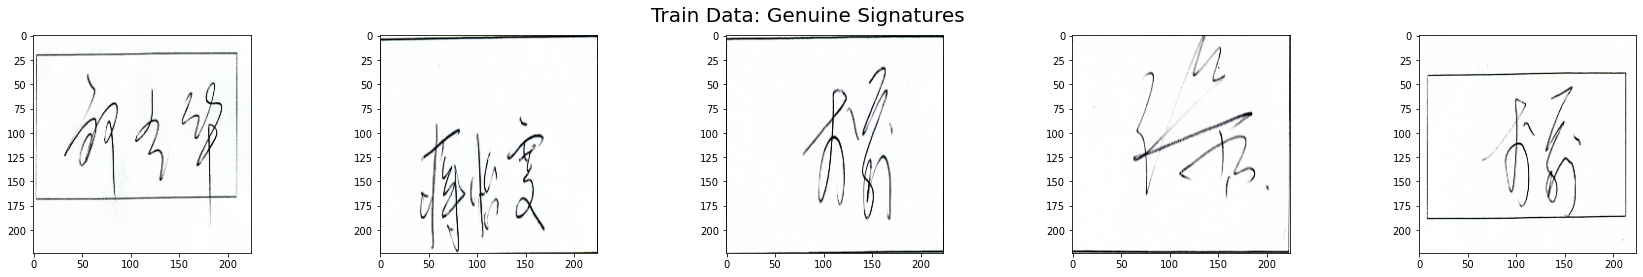

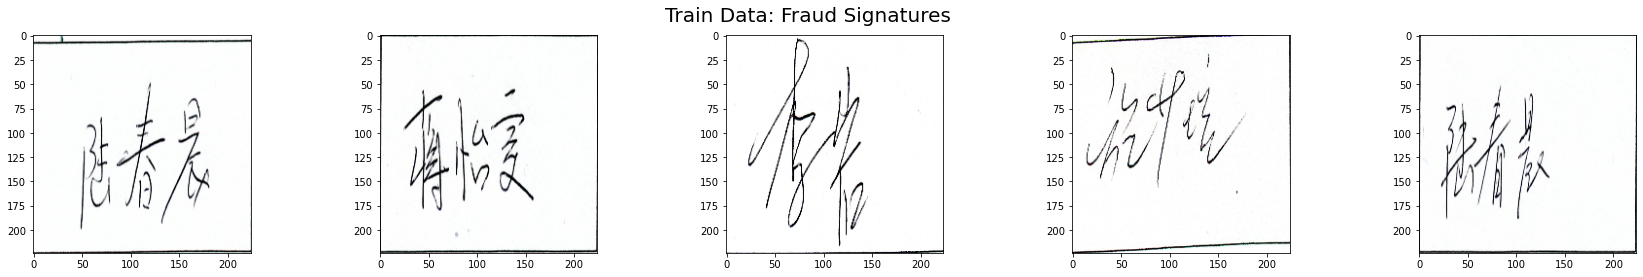

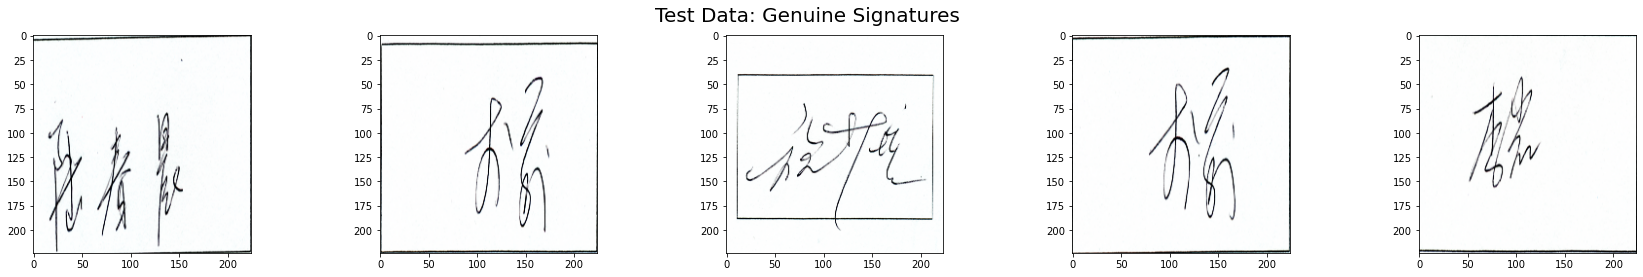

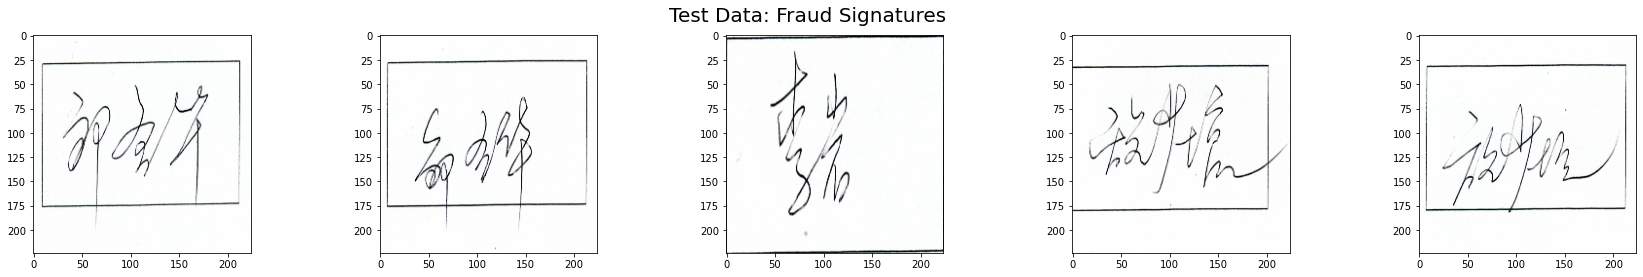

In [4]:
def training(data):
    plt.figure(figsize = (30,4))
    x_axis, y_axis = 1, 5
    for i in range(5):
        plt.subplot(x_axis, y_axis, i+1)
        img_read = C.imread(data[i], 1)
        img_resized = C.resize(img_read, (224,224)) #to covert all images to same size
        plt.imshow(img_resized)  
    


training(training_real)
plt.suptitle('Train Data: Genuine Signatures', fontsize = 20)
plt.show()

training(training_fake)
plt.suptitle('Train Data: Fraud Signatures', fontsize = 20)
plt.show()

training(testing_real)
plt.suptitle('Test Data: Genuine Signatures', fontsize = 20)
plt.show()

training(testing_fake)
plt.suptitle('Test Data: Fraud Signatures', fontsize = 20)
plt.show()

In [5]:
training_data = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory("/kaggle/input/signaturesigcomp/all/train/", target_size=(224,224), class_mode='binary',batch_size = 10)
testing_data = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory("/kaggle/input/signaturesigcomp/all/test/", target_size=(224,224), class_mode='binary',batch_size = 4,shuffle = False)
validation_data = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory("/kaggle/input/signaturesigcomp/all/val/", target_size=(224,224), class_mode='binary',batch_size = 4)


Found 347 images belonging to 2 classes.
Found 100 images belonging to 2 classes.
Found 128 images belonging to 2 classes.


In [6]:
print(training_data[0][0].shape)
print(testing_data[0][0].shape)
print(validation_data[0][0].shape)

(10, 224, 224, 3)
(4, 224, 224, 3)
(4, 224, 224, 3)


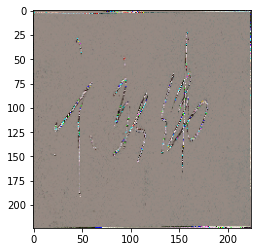

In [7]:
plt.imshow(np.uint8(training_data[0][0][0]))
plt.show()

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

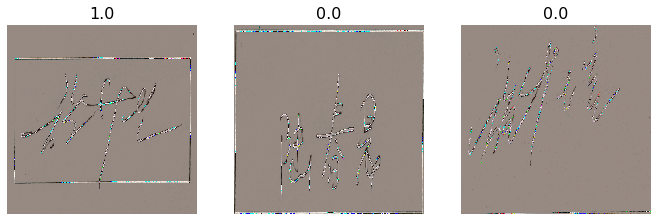

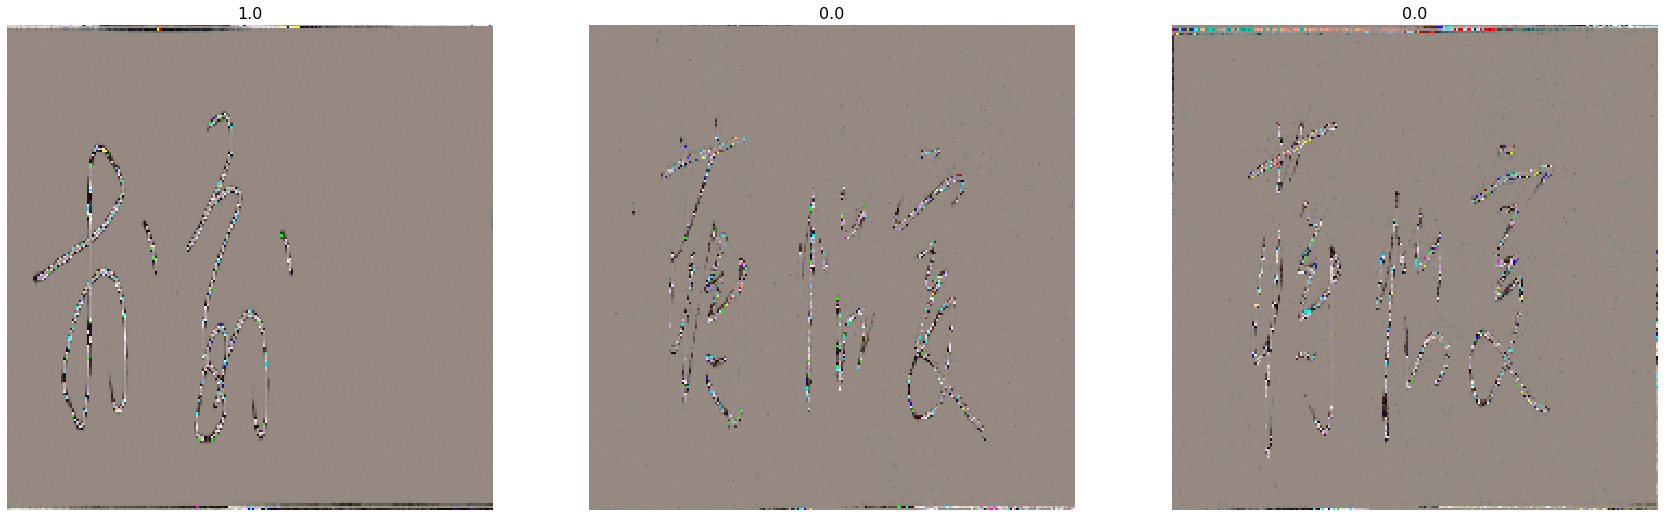

In [8]:
def plots(image_input, figsize=(40,20), rows=1, interp=False, titles=None):
    if type(image_input[0]) is np.ndarray:
        image_input = np.array(image_input).astype(np.uint8)
        if (image_input.shape[-1] != 3):
            image_input = image_input.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(image_input)//rows if len(image_input) % 2 == 0 else len(image_input)//rows + 1
    for i in range(1,4):#len(ims)
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(image_input[i], interpolation=None if interp else 'none')
        
train_image_input, labels = next(training_data)
plots(train_image_input, titles = labels)

test_image_input , test_labels = next(testing_data)
plots(test_image_input, titles = labels)
testing_data.classes

### functions to:
- compile and fit the model
- To plot confusion matrix

In [9]:
def compile_model(optimizer,loss):
    model.compile(loss=loss, optimizer=optimizer,metrics=['accuracy'])
    
def fit_model(epochs,training_data,validation_data,testing_data,batchsize_train,batchsize_val):
    history = model.fit_generator(generator=training_data,epochs=epochs,validation_data=validation_data,steps_per_epoch=batchsize_train,validation_steps=batchsize_val,verbose=2)
    Testing_loss, Testing_acc = model.evaluate(testing_data)
    print('Resultant Testing loss:',Testing_loss)
    print('Resultant Testing accuracy:',Testing_acc)
    return history

def fit_model_new(epochs,training_data,validation_data,testing_data,batchsize_train,batchsize_val):
    history = model.fit(x=training_data,epochs=epochs,validation_data=validation_data,steps_per_epoch=batchsize_train,validation_steps=batchsize_val,verbose=2)
    return history

def confusion_matrix_plot(cm,classes,normalize=False,title= 'Confusion Matrix',cmap=plt.cm.Blues):
    ticks = np.arange(len(classes))
    plt.title(title)
    plt.imshow(cm,interpolation='nearest',cmap=cmap)
    plt.colorbar()
    plt.xticks(ticks,classes,rotation=50)
    plt.yticks(ticks,classes,rotation=50)
    plt.tight_layout()
    plt.ylabel('True labels')
    plt.xlabel('Predicted labels')
   #if normalize:
   #    cm = cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
   #    print("Confusion Matrix: Normalized")
   #else:
    print("Confusion Matrix")
    print(cm)
    
    threshold = cm.max()/2
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,cm[i,j],
                horizontalalignment = "center",
                color = "white" if cm[i,j]> threshold else "black")
    
    
    

#### Function to plot the graph

In [10]:
def plot_graph(graph,method,epoch,optimizer,value_1,value_2,legend_1,legend_2,ymax,ymin):
    plt.rcParams.update({'font.size': 13})
    fig, ax = plt.subplots(figsize = (10,5))
    ax.plot(value_1,  color = 'red', marker='.', linewidth='0.75')
    ax.plot(value_2, color = 'green', marker='.', linewidth='0.75')
    plt.xticks(rotation='90')
    plt.gca().margins(x=0)
    plt.legend([legend_1,legend_2 ], loc='lower left')
    if ymax != 0.00:
        plt.ylim(ymax = ymax, ymin = ymin)
    
    title = method+': Epoch-'+str(epoch)+', Optimizer-'+optimizer+''
    ax.set(xlabel="Epochs", ylabel=graph, title= title);
    plt.show()

### CNN-3(modified)

In [68]:
from keras import backend as K
K.clear_session()

model = Sequential()
model.add(Conv2D(16, kernel_size=(3,3), activation='relu',padding='same', input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=(4,4), strides=4))
model.add(Dropout(0.20))

model.add(Conv2D(32, kernel_size=(3,3), activation='relu',padding='same'))
model.add(Conv2D(32, kernel_size=(3,3), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(4,4), strides=4))
model.add(Dropout(0.20))

model.add(Conv2D(64, kernel_size=(3,3), activation='relu',padding='same'))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(4,4), strides=4))
model.add(Dropout(0.20))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu',padding='same'))
model.add(Conv2D(256, kernel_size=(3,3), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2))
model.add(Dropout(0.20))

model.add(Flatten())
model.add(Dense(2, activation='softmax'))

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 56, 56, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 56, 56, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 56, 56, 32)        4640      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0

Epoch 1/15
34/34 - 9s - loss: 6.0929 - accuracy: 0.5045 - val_loss: 0.6881 - val_accuracy: 0.6000
Epoch 2/15
34/34 - 8s - loss: 0.6790 - accuracy: 0.5727 - val_loss: 0.6874 - val_accuracy: 0.6500
Epoch 3/15
34/34 - 7s - loss: 0.6959 - accuracy: 0.5846 - val_loss: 0.6849 - val_accuracy: 0.5750
Epoch 4/15
34/34 - 7s - loss: 0.6568 - accuracy: 0.6083 - val_loss: 0.6427 - val_accuracy: 0.6125
Epoch 5/15
34/34 - 7s - loss: 0.6787 - accuracy: 0.5935 - val_loss: 0.6822 - val_accuracy: 0.5125
Epoch 6/15
34/34 - 7s - loss: 0.6667 - accuracy: 0.5757 - val_loss: 0.6638 - val_accuracy: 0.5750
Epoch 7/15
34/34 - 7s - loss: 0.6513 - accuracy: 0.6113 - val_loss: 0.6374 - val_accuracy: 0.6750
Epoch 8/15
34/34 - 7s - loss: 0.6278 - accuracy: 0.6409 - val_loss: 0.6050 - val_accuracy: 0.7250
Epoch 9/15
34/34 - 8s - loss: 0.6484 - accuracy: 0.6469 - val_loss: 0.6733 - val_accuracy: 0.5875
Epoch 10/15
34/34 - 7s - loss: 0.6034 - accuracy: 0.6469 - val_loss: 0.6437 - val_accuracy: 0.6875
Epoch 11/15
34/34 -

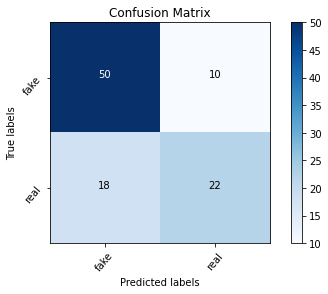

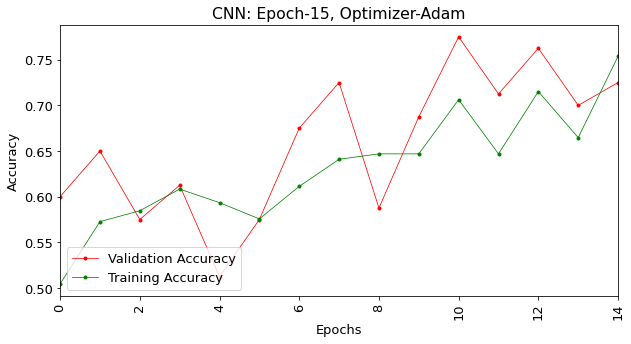

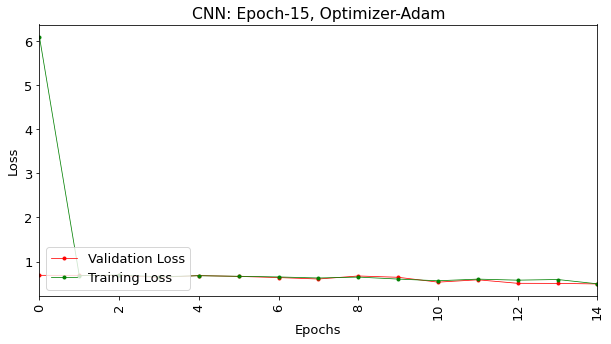

In [12]:
compile_model('Adam','sparse_categorical_crossentropy')
history = fit_model_new(15,training_data,validation_data,testing_data,34,20)

#confusion matrix and prediction
prediction= model.predict(x=testing_data,verbose=2)
np.round(prediction)   
cm = confusion_matrix(y_true = testing_data.classes, y_pred = np.argmax(prediction,axis = -1))
cm_plot_labels = ['fake','real']
confusion_matrix_plot(cm = cm, classes = cm_plot_labels, title= 'Confusion Matrix')

print('classification_report:\n',classification_report(testing_data.classes,np.argmax(prediction,axis = -1)))

plot_graph('Accuracy','CNN',15,'Adam',history.history['val_accuracy'],history.history['accuracy'],'Validation Accuracy','Training Accuracy',0.00,0.00)
plot_graph('Loss',    'CNN',15,'Adam',history.history['val_loss'],history.history['loss'],'Validation Loss','Training Loss',0.00,0.00)

Epoch 1/25
34/34 - 7s - loss: 0.5934 - accuracy: 0.7003 - val_loss: 0.5012 - val_accuracy: 0.6875
Epoch 2/25
34/34 - 8s - loss: 0.4861 - accuracy: 0.7389 - val_loss: 0.4821 - val_accuracy: 0.7250
Epoch 3/25
34/34 - 7s - loss: 0.5066 - accuracy: 0.7596 - val_loss: 0.5491 - val_accuracy: 0.7625
Epoch 4/25
34/34 - 7s - loss: 0.4525 - accuracy: 0.8042 - val_loss: 0.4419 - val_accuracy: 0.7875
Epoch 5/25
34/34 - 7s - loss: 0.4237 - accuracy: 0.8012 - val_loss: 0.4387 - val_accuracy: 0.8000
Epoch 6/25
34/34 - 7s - loss: 0.3668 - accuracy: 0.8487 - val_loss: 0.4519 - val_accuracy: 0.8250
Epoch 7/25
34/34 - 7s - loss: 0.3605 - accuracy: 0.8071 - val_loss: 0.3303 - val_accuracy: 0.8250
Epoch 8/25
34/34 - 7s - loss: 0.3517 - accuracy: 0.8457 - val_loss: 0.4307 - val_accuracy: 0.7750
Epoch 9/25
34/34 - 7s - loss: 0.3499 - accuracy: 0.8338 - val_loss: 0.4366 - val_accuracy: 0.7750
Epoch 10/25
34/34 - 8s - loss: 0.2812 - accuracy: 0.8843 - val_loss: 0.5039 - val_accuracy: 0.8250
Epoch 11/25
34/34 -

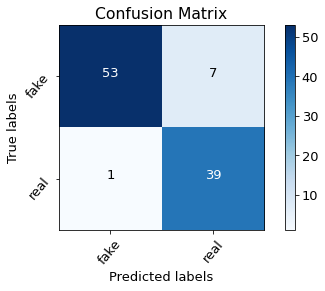

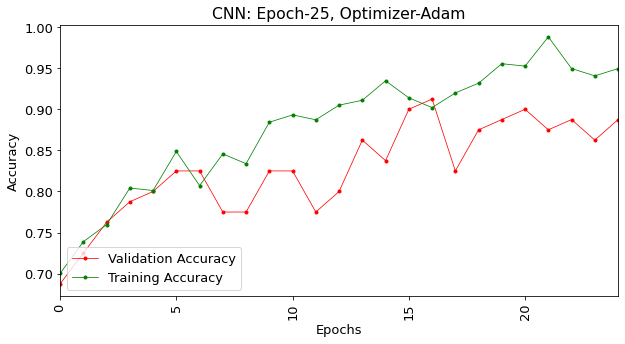

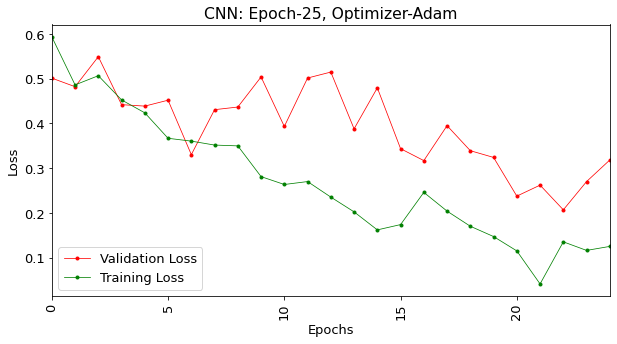

In [13]:
compile_model('Adam','sparse_categorical_crossentropy')
history = fit_model_new(25,training_data,validation_data,testing_data,34,20)

#confusion matrix and prediction
prediction= model.predict(x=testing_data,verbose=2)
np.round(prediction)   
cm = confusion_matrix(y_true = testing_data.classes, y_pred = np.argmax(prediction,axis = -1))
cm_plot_labels = ['fake','real']
confusion_matrix_plot(cm = cm, classes = cm_plot_labels, title= 'Confusion Matrix')

print('classification_report:\n',classification_report(testing_data.classes,np.argmax(prediction,axis = -1)))

plot_graph('Accuracy','CNN',25,'Adam',history.history['val_accuracy'],history.history['accuracy'],'Validation Accuracy','Training Accuracy',0.00,0.00)
plot_graph('Loss',    'CNN',25,'Adam',history.history['val_loss'],history.history['loss'],'Validation Loss','Training Loss',0.00,0.00)

Epoch 1/15
34/34 - 8s - loss: 0.1445 - accuracy: 0.9585 - val_loss: 0.3167 - val_accuracy: 0.8875
Epoch 2/15
34/34 - 7s - loss: 0.0510 - accuracy: 0.9822 - val_loss: 0.3367 - val_accuracy: 0.9000
Epoch 3/15
34/34 - 7s - loss: 0.0280 - accuracy: 0.9941 - val_loss: 0.1624 - val_accuracy: 0.9500
Epoch 4/15
34/34 - 7s - loss: 0.0119 - accuracy: 0.9970 - val_loss: 0.3706 - val_accuracy: 0.8875
Epoch 5/15
34/34 - 7s - loss: 0.0147 - accuracy: 0.9941 - val_loss: 0.3271 - val_accuracy: 0.9250
Epoch 6/15
34/34 - 7s - loss: 0.0233 - accuracy: 0.9881 - val_loss: 0.5834 - val_accuracy: 0.9000
Epoch 7/15
34/34 - 7s - loss: 0.1098 - accuracy: 0.9555 - val_loss: 0.3402 - val_accuracy: 0.9000
Epoch 8/15
34/34 - 7s - loss: 0.1015 - accuracy: 0.9614 - val_loss: 0.3456 - val_accuracy: 0.9000
Epoch 9/15
34/34 - 8s - loss: 0.0528 - accuracy: 0.9852 - val_loss: 0.2317 - val_accuracy: 0.9125
Epoch 10/15
34/34 - 7s - loss: 0.0602 - accuracy: 0.9792 - val_loss: 0.4416 - val_accuracy: 0.8750
Epoch 11/15
34/34 -

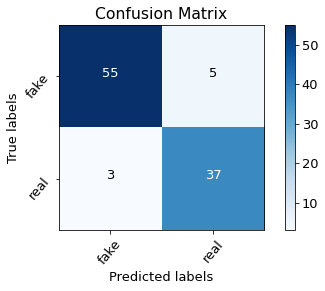

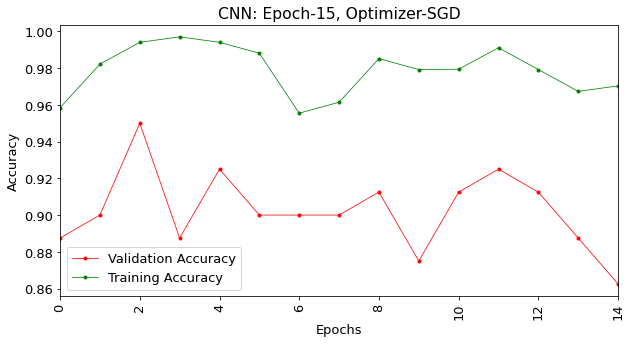

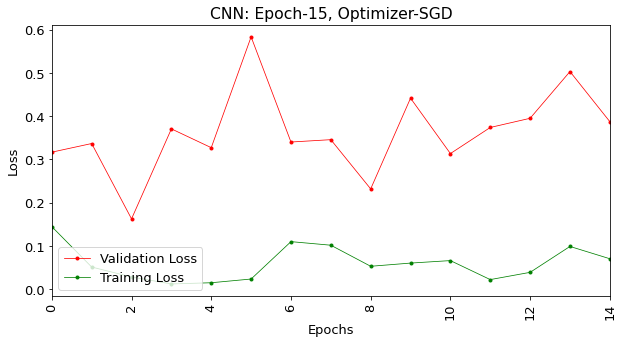

In [14]:
compile_model(SGD,'sparse_categorical_crossentropy')
history = fit_model_new(15,training_data,validation_data,testing_data,34,20)

#confusion matrix and prediction
prediction= model.predict(x=testing_data,verbose=2)
np.round(prediction)   
cm = confusion_matrix(y_true = testing_data.classes, y_pred = np.argmax(prediction,axis = -1))
cm_plot_labels = ['fake','real']
confusion_matrix_plot(cm = cm, classes = cm_plot_labels, title= 'Confusion Matrix')

print('classification_report:\n',classification_report(testing_data.classes,np.argmax(prediction,axis = -1)))

plot_graph('Accuracy','CNN',15,'SGD',history.history['val_accuracy'],history.history['accuracy'],'Validation Accuracy','Training Accuracy',0.00,0.00)
plot_graph('Loss',    'CNN',15,'SGD',history.history['val_loss'],history.history['loss'],'Validation Loss','Training Loss',0.00,0.00)

Epoch 1/25
34/34 - 7s - loss: 0.0296 - accuracy: 0.9941 - val_loss: 0.3495 - val_accuracy: 0.8750
Epoch 2/25
34/34 - 7s - loss: 0.0352 - accuracy: 0.9852 - val_loss: 0.3902 - val_accuracy: 0.9000
Epoch 3/25
34/34 - 7s - loss: 0.0110 - accuracy: 1.0000 - val_loss: 0.4601 - val_accuracy: 0.9000
Epoch 4/25
34/34 - 7s - loss: 0.0115 - accuracy: 0.9970 - val_loss: 0.2720 - val_accuracy: 0.9000
Epoch 5/25
34/34 - 8s - loss: 0.0328 - accuracy: 0.9912 - val_loss: 0.4523 - val_accuracy: 0.9000
Epoch 6/25
34/34 - 7s - loss: 0.0281 - accuracy: 0.9881 - val_loss: 0.4010 - val_accuracy: 0.8750
Epoch 7/25
34/34 - 7s - loss: 0.0723 - accuracy: 0.9822 - val_loss: 0.3086 - val_accuracy: 0.9000
Epoch 8/25
34/34 - 7s - loss: 0.0086 - accuracy: 1.0000 - val_loss: 0.1856 - val_accuracy: 0.9500
Epoch 9/25
34/34 - 8s - loss: 0.0204 - accuracy: 0.9911 - val_loss: 0.1321 - val_accuracy: 0.9625
Epoch 10/25
34/34 - 8s - loss: 0.0301 - accuracy: 0.9853 - val_loss: 0.3151 - val_accuracy: 0.9250
Epoch 11/25
34/34 -

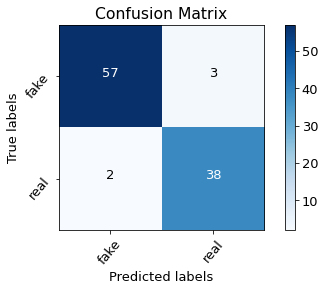

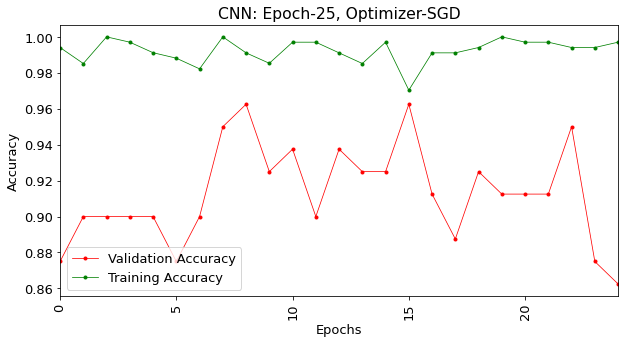

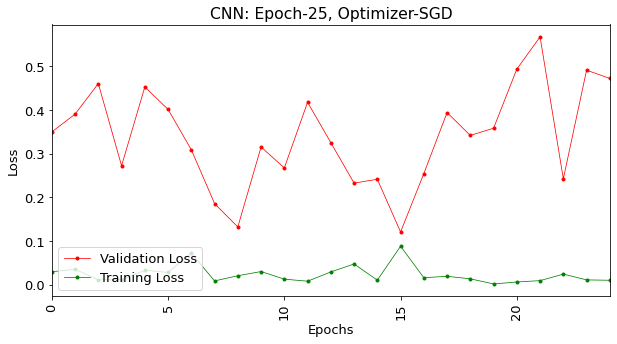

In [15]:
compile_model(SGD,'sparse_categorical_crossentropy')
history = fit_model_new(25,training_data,validation_data,testing_data,34,20)

#confusion matrix and prediction
prediction= model.predict(x=testing_data,verbose=2)
np.round(prediction)   
cm = confusion_matrix(y_true = testing_data.classes, y_pred = np.argmax(prediction,axis = -1))
cm_plot_labels = ['fake','real']
confusion_matrix_plot(cm = cm, classes = cm_plot_labels, title= 'Confusion Matrix')

print('classification_report:\n',classification_report(testing_data.classes,np.argmax(prediction,axis = -1)))

plot_graph('Accuracy','CNN',25,'SGD',history.history['val_accuracy'],history.history['accuracy'],'Validation Accuracy','Training Accuracy',0.00,0.00)
plot_graph('Loss',    'CNN',25,'SGD',history.history['val_loss'],history.history['loss'],'Validation Loss','Training Loss',0.00,0.00)

Epoch 1/15
34/34 - 8s - loss: 0.0446 - accuracy: 0.9911 - val_loss: 0.5468 - val_accuracy: 0.9000
Epoch 2/15
34/34 - 7s - loss: 0.0898 - accuracy: 0.9763 - val_loss: 0.9358 - val_accuracy: 0.8375
Epoch 3/15
34/34 - 7s - loss: 0.2185 - accuracy: 0.9614 - val_loss: 0.2511 - val_accuracy: 0.9500
Epoch 4/15
34/34 - 7s - loss: 0.0742 - accuracy: 0.9852 - val_loss: 0.4691 - val_accuracy: 0.8750
Epoch 5/15
34/34 - 7s - loss: 0.0336 - accuracy: 0.9881 - val_loss: 1.6606 - val_accuracy: 0.8750
Epoch 6/15
34/34 - 7s - loss: 8.2826e-04 - accuracy: 1.0000 - val_loss: 1.1340 - val_accuracy: 0.8875
Epoch 7/15
34/34 - 7s - loss: 0.2366 - accuracy: 0.9763 - val_loss: 0.6740 - val_accuracy: 0.9125
Epoch 8/15
34/34 - 7s - loss: 0.1544 - accuracy: 0.9703 - val_loss: 1.0912 - val_accuracy: 0.8875
Epoch 9/15
34/34 - 8s - loss: 0.0916 - accuracy: 0.9792 - val_loss: 0.6719 - val_accuracy: 0.9125
Epoch 10/15
34/34 - 7s - loss: 0.0890 - accuracy: 0.9822 - val_loss: 0.5380 - val_accuracy: 0.9250
Epoch 11/15
34/

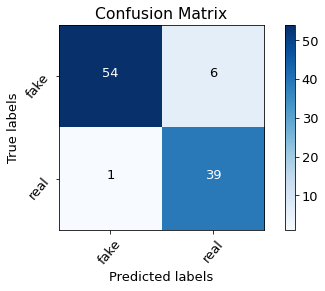

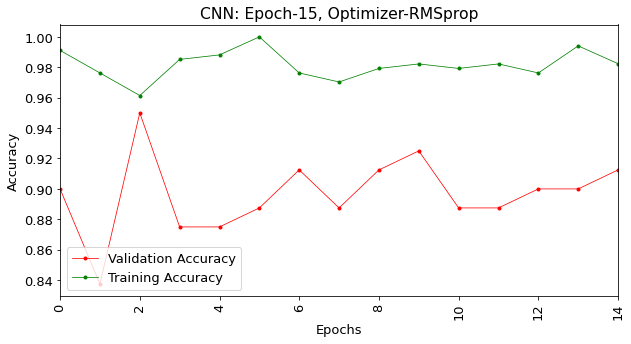

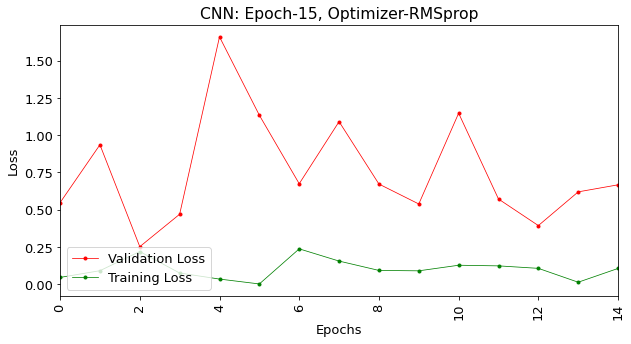

In [16]:
compile_model('RMSprop','sparse_categorical_crossentropy')
history = fit_model_new(15,training_data,validation_data,testing_data,34,20)

#confusion matrix and prediction
prediction= model.predict(x=testing_data,verbose=2)
np.round(prediction)   
cm = confusion_matrix(y_true = testing_data.classes, y_pred = np.argmax(prediction,axis = -1))
cm_plot_labels = ['fake','real']
confusion_matrix_plot(cm = cm, classes = cm_plot_labels, title= 'Confusion Matrix')

print('classification_report:\n',classification_report(testing_data.classes,np.argmax(prediction,axis = -1)))

plot_graph('Accuracy','CNN',15,'RMSprop',history.history['val_accuracy'],history.history['accuracy'],'Validation Accuracy','Training Accuracy',0.00,0.00)
plot_graph('Loss',    'CNN',15,'RMSprop',history.history['val_loss'],history.history['loss'],'Validation Loss','Training Loss',0.00,0.00)

Epoch 1/25
34/34 - 8s - loss: 0.0267 - accuracy: 0.9970 - val_loss: 0.5561 - val_accuracy: 0.9625
Epoch 2/25
34/34 - 8s - loss: 0.1840 - accuracy: 0.9733 - val_loss: 0.4877 - val_accuracy: 0.9500
Epoch 3/25
34/34 - 7s - loss: 0.1262 - accuracy: 0.9852 - val_loss: 2.0135 - val_accuracy: 0.8250
Epoch 4/25
34/34 - 7s - loss: 0.1227 - accuracy: 0.9792 - val_loss: 0.7320 - val_accuracy: 0.9625
Epoch 5/25
34/34 - 7s - loss: 0.1006 - accuracy: 0.9822 - val_loss: 1.3074 - val_accuracy: 0.8375
Epoch 6/25
34/34 - 7s - loss: 0.1290 - accuracy: 0.9763 - val_loss: 1.8435 - val_accuracy: 0.9125
Epoch 7/25
34/34 - 7s - loss: 0.1385 - accuracy: 0.9822 - val_loss: 0.5478 - val_accuracy: 0.8875
Epoch 8/25
34/34 - 7s - loss: 0.0338 - accuracy: 0.9970 - val_loss: 0.9289 - val_accuracy: 0.8750
Epoch 9/25
34/34 - 7s - loss: 0.0021 - accuracy: 1.0000 - val_loss: 1.0351 - val_accuracy: 0.8875
Epoch 10/25
34/34 - 7s - loss: 0.2046 - accuracy: 0.9763 - val_loss: 0.8856 - val_accuracy: 0.9125
Epoch 11/25
34/34 -

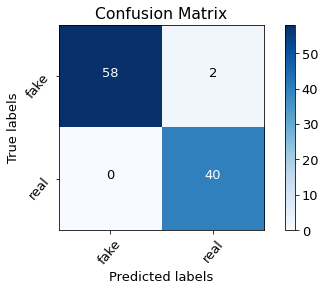

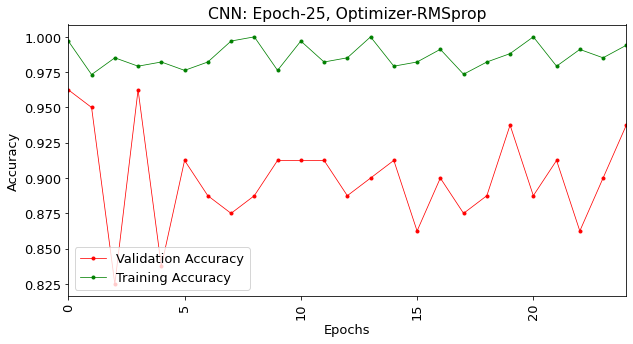

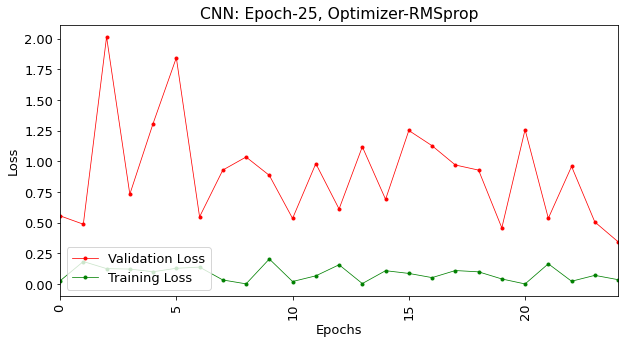

In [17]:
compile_model('RMSprop','sparse_categorical_crossentropy')
history = fit_model_new(25,training_data,validation_data,testing_data,34,20)

#confusion matrix and prediction
prediction= model.predict(x=testing_data,verbose=2)
np.round(prediction)   
cm = confusion_matrix(y_true = testing_data.classes, y_pred = np.argmax(prediction,axis = -1))
cm_plot_labels = ['fake','real']
confusion_matrix_plot(cm = cm, classes = cm_plot_labels, title= 'Confusion Matrix')

print('classification_report:\n',classification_report(testing_data.classes,np.argmax(prediction,axis = -1)))

plot_graph('Accuracy','CNN',25,'RMSprop',history.history['val_accuracy'],history.history['accuracy'],'Validation Accuracy','Training Accuracy',0.00,0.00)
plot_graph('Loss',    'CNN',25,'RMSprop',history.history['val_loss'],history.history['loss'],'Validation Loss','Training Loss',0.00,0.00)

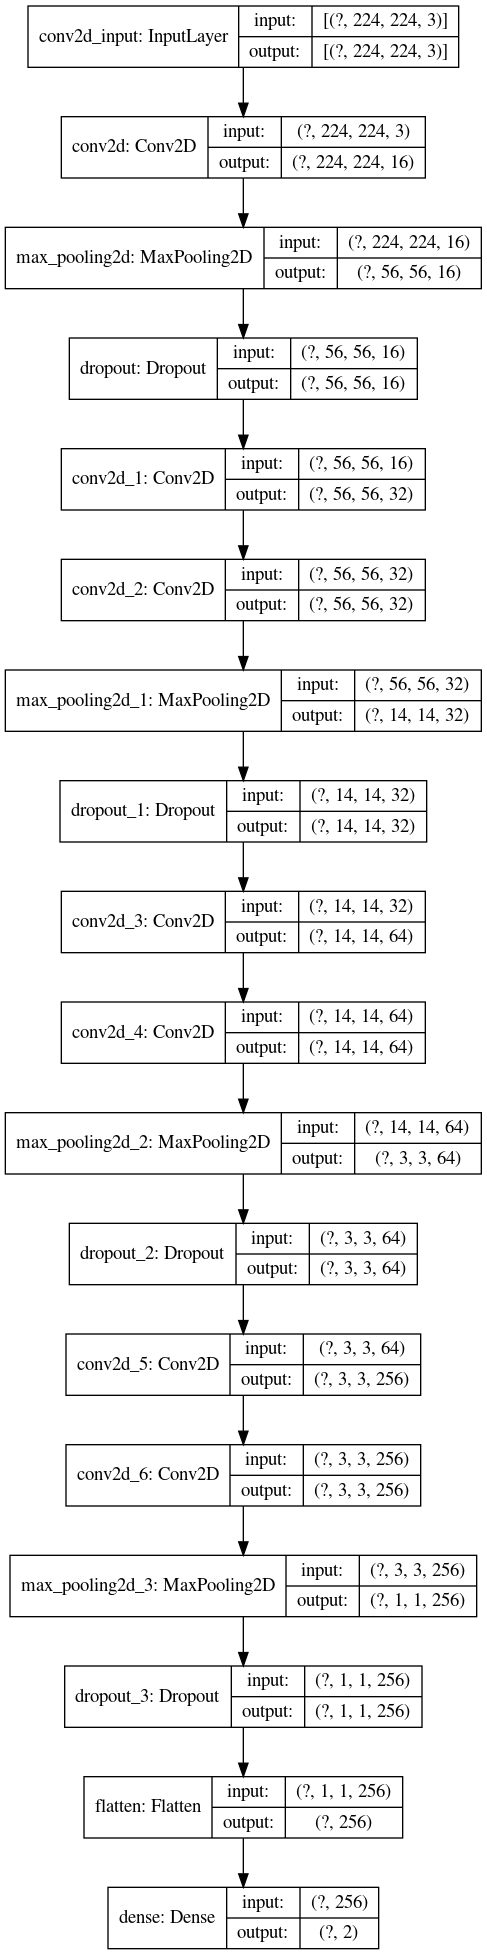

In [69]:
plot_model(model, to_file='Final_CNN.png', show_shapes=True, show_layer_names=True)

###  CNN-1

In [23]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='relu',padding='same', input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=(2,2), strides=2))
model.add(Dropout(0.50))

model.add(Conv2D(64, kernel_size=(3,3), activation='relu',padding='same'))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2))
model.add(Dropout(0.50))

model.add(Conv2D(128, kernel_size=(3,3), activation='relu',padding='same'))
model.add(Conv2D(128, kernel_size=(3,3), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2))
model.add(Dropout(0.50))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu',padding='same'))
model.add(Conv2D(256, kernel_size=(3,3), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2))
model.add(Dropout(0.50))

model.add(Flatten())
model.add(Dense(2, activation='softmax'))

print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 112, 112, 32)      0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 112, 112, 64)      18496     
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 112, 112, 64)      36928     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 56, 56, 64)        0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 56, 56, 64)       

In [24]:
compile_model('Adam','binary_crossentropy')
history = fit_model_new(5,training_data,validation_data,testing_data,34,10)

Epoch 1/5
34/34 - 7s - loss: 7.6024 - accuracy: 0.5786 - val_loss: 7.6598 - val_accuracy: 0.6000
Epoch 2/5
34/34 - 7s - loss: 7.6609 - accuracy: 0.5875 - val_loss: 7.6664 - val_accuracy: 0.5250
Epoch 3/5
34/34 - 7s - loss: 7.6611 - accuracy: 0.5846 - val_loss: 7.6729 - val_accuracy: 0.4500
Epoch 4/5
34/34 - 7s - loss: 7.6606 - accuracy: 0.5905 - val_loss: 7.6620 - val_accuracy: 0.5750
Epoch 5/5
34/34 - 7s - loss: 7.6609 - accuracy: 0.5875 - val_loss: 7.6685 - val_accuracy: 0.5000


In [25]:
compile_model('Adam','sparse_categorical_crossentropy')
history = fit_model_new(5,training_data,validation_data,testing_data,34,20)

Epoch 1/5
34/34 - 7s - loss: 1630.3604 - accuracy: 0.5015 - val_loss: 0.6937 - val_accuracy: 0.5000
Epoch 2/5
34/34 - 7s - loss: 0.7054 - accuracy: 0.5549 - val_loss: 0.6863 - val_accuracy: 0.5750
Epoch 3/5
34/34 - 8s - loss: 0.6848 - accuracy: 0.5905 - val_loss: 0.6797 - val_accuracy: 0.6000
Epoch 4/5
34/34 - 7s - loss: 0.7005 - accuracy: 0.5668 - val_loss: 0.6859 - val_accuracy: 0.6000
Epoch 5/5
34/34 - 7s - loss: 0.6879 - accuracy: 0.5727 - val_loss: 0.6919 - val_accuracy: 0.5250


In [26]:
testing_data.class_indices

{'fake': 0, 'real': 1}

In [27]:
compile_model('Adam','sparse_categorical_crossentropy')
history = fit_model_new(25,training_data,validation_data,testing_data,34,20)

Epoch 1/25
34/34 - 8s - loss: 0.7295 - accuracy: 0.5460 - val_loss: 0.6911 - val_accuracy: 0.5875
Epoch 2/25
34/34 - 8s - loss: 0.6638 - accuracy: 0.5964 - val_loss: 0.6450 - val_accuracy: 0.6875
Epoch 3/25
34/34 - 7s - loss: 0.5719 - accuracy: 0.6944 - val_loss: 0.5909 - val_accuracy: 0.7125
Epoch 4/25
34/34 - 7s - loss: 0.6450 - accuracy: 0.6973 - val_loss: 0.6770 - val_accuracy: 0.6250
Epoch 5/25
34/34 - 7s - loss: 0.5961 - accuracy: 0.7181 - val_loss: 0.5512 - val_accuracy: 0.7750
Epoch 6/25
34/34 - 7s - loss: 0.5288 - accuracy: 0.7478 - val_loss: 0.4328 - val_accuracy: 0.8250
Epoch 7/25
34/34 - 7s - loss: 0.5199 - accuracy: 0.7537 - val_loss: 0.5122 - val_accuracy: 0.8000
Epoch 8/25
34/34 - 7s - loss: 0.4440 - accuracy: 0.7923 - val_loss: 0.3794 - val_accuracy: 0.8250
Epoch 9/25
34/34 - 8s - loss: 0.4801 - accuracy: 0.7685 - val_loss: 0.3833 - val_accuracy: 0.8375
Epoch 10/25
34/34 - 7s - loss: 0.4221 - accuracy: 0.8190 - val_loss: 0.4439 - val_accuracy: 0.8250
Epoch 11/25
34/34 -

25/25 - 2s
Confusion Matrix
[[55  5]
 [ 9 31]]
classification_report:
               precision    recall  f1-score   support

           0       0.86      0.92      0.89        60
           1       0.86      0.78      0.82        40

    accuracy                           0.86       100
   macro avg       0.86      0.85      0.85       100
weighted avg       0.86      0.86      0.86       100



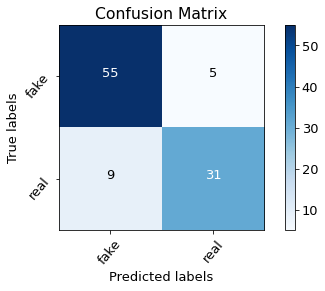

In [28]:
#confusion matrix and prediction
prediction= model.predict(x=testing_data,verbose=2)
np.round(prediction)   
cm = confusion_matrix(y_true = testing_data.classes, y_pred = np.argmax(prediction,axis = -1))
cm_plot_labels = ['fake','real']
confusion_matrix_plot(cm = cm, classes = cm_plot_labels, title= 'Confusion Matrix')

print('classification_report:\n',classification_report(testing_data.classes,np.argmax(prediction,axis = -1)))


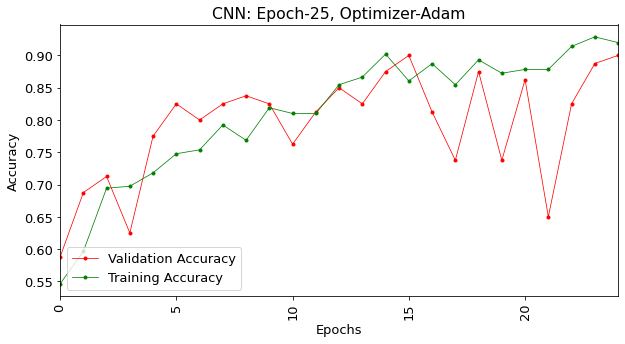

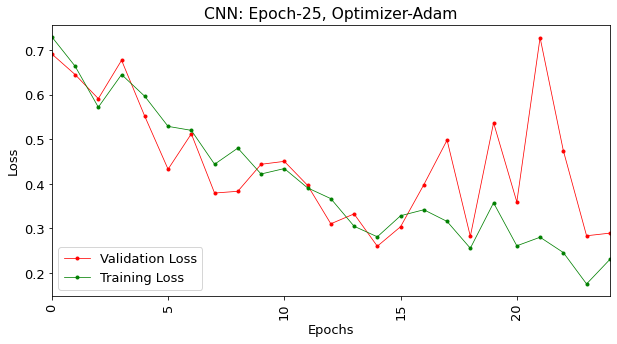

In [29]:
plot_graph('Accuracy','CNN',25,'Adam',history.history['val_accuracy'],history.history['accuracy'],'Validation Accuracy','Training Accuracy',0.00,0.00)
plot_graph('Loss',    'CNN',25,'Adam',history.history['val_loss'],history.history['loss'],'Validation Loss','Training Loss',0.00,0.00)

Epoch 1/25
34/34 - 8s - loss: 0.2373 - accuracy: 0.9139 - val_loss: 0.2081 - val_accuracy: 0.9375
Epoch 2/25
34/34 - 7s - loss: 0.1486 - accuracy: 0.9377 - val_loss: 0.2399 - val_accuracy: 0.9000
Epoch 3/25
34/34 - 7s - loss: 0.1227 - accuracy: 0.9555 - val_loss: 0.3255 - val_accuracy: 0.8875
Epoch 4/25
34/34 - 7s - loss: 0.2078 - accuracy: 0.9169 - val_loss: 0.3499 - val_accuracy: 0.8625
Epoch 5/25
34/34 - 7s - loss: 0.1048 - accuracy: 0.9614 - val_loss: 0.2518 - val_accuracy: 0.9250
Epoch 6/25
34/34 - 7s - loss: 0.0950 - accuracy: 0.9614 - val_loss: 0.1809 - val_accuracy: 0.9250
Epoch 7/25
34/34 - 8s - loss: 0.0644 - accuracy: 0.9763 - val_loss: 0.2385 - val_accuracy: 0.9250
Epoch 8/25
34/34 - 7s - loss: 0.1026 - accuracy: 0.9703 - val_loss: 0.5786 - val_accuracy: 0.7125
Epoch 9/25
34/34 - 7s - loss: 0.2877 - accuracy: 0.9258 - val_loss: 0.1935 - val_accuracy: 0.9000
Epoch 10/25
34/34 - 7s - loss: 0.0888 - accuracy: 0.9674 - val_loss: 0.2465 - val_accuracy: 0.9250
Epoch 11/25
34/34 -

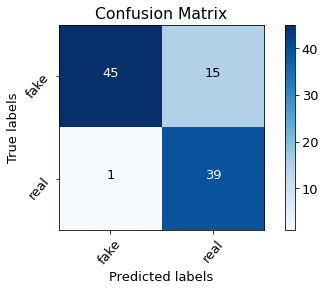

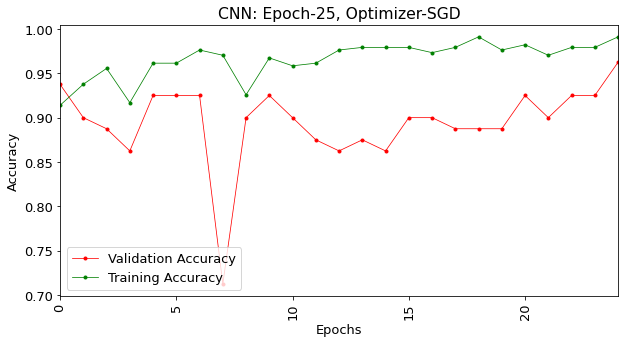

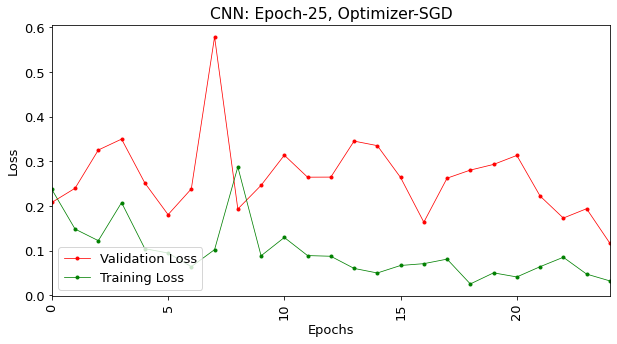

In [30]:
compile_model('SGD','sparse_categorical_crossentropy')
history = fit_model_new(25,training_data,validation_data,testing_data,34,20)

#confusion matrix and prediction
prediction= model.predict(x=testing_data,verbose=2)
np.round(prediction)   
cm = confusion_matrix(y_true = testing_data.classes, y_pred = np.argmax(prediction,axis = -1))
cm_plot_labels = ['fake','real']
confusion_matrix_plot(cm = cm, classes = cm_plot_labels, title= 'Confusion Matrix')

print('classification_report:\n',classification_report(testing_data.classes,np.argmax(prediction,axis = -1)))

plot_graph('Accuracy','CNN',25,'SGD',history.history['val_accuracy'],history.history['accuracy'],'Validation Accuracy','Training Accuracy',0.00,0.00)
plot_graph('Loss',    'CNN',25,'SGD',history.history['val_loss'],history.history['loss'],'Validation Loss','Training Loss',0.00,0.00)

Epoch 1/25
34/34 - 8s - loss: 0.1351 - accuracy: 0.9644 - val_loss: 0.2808 - val_accuracy: 0.9125
Epoch 2/25
34/34 - 7s - loss: 0.1086 - accuracy: 0.9822 - val_loss: 0.4188 - val_accuracy: 0.8875
Epoch 3/25
34/34 - 8s - loss: 0.2110 - accuracy: 0.9466 - val_loss: 0.6677 - val_accuracy: 0.8375
Epoch 4/25
34/34 - 7s - loss: 0.2213 - accuracy: 0.9674 - val_loss: 0.5962 - val_accuracy: 0.8375
Epoch 5/25
34/34 - 7s - loss: 0.0542 - accuracy: 0.9763 - val_loss: 0.3510 - val_accuracy: 0.9125
Epoch 6/25
34/34 - 8s - loss: 0.0907 - accuracy: 0.9733 - val_loss: 0.4087 - val_accuracy: 0.8750
Epoch 7/25
34/34 - 8s - loss: 0.0936 - accuracy: 0.9763 - val_loss: 0.6403 - val_accuracy: 0.8625
Epoch 8/25
34/34 - 7s - loss: 0.1952 - accuracy: 0.9525 - val_loss: 1.4433 - val_accuracy: 0.7750
Epoch 9/25
34/34 - 7s - loss: 0.1294 - accuracy: 0.9792 - val_loss: 0.7607 - val_accuracy: 0.8500
Epoch 10/25
34/34 - 7s - loss: 0.1673 - accuracy: 0.9733 - val_loss: 0.3041 - val_accuracy: 0.9125
Epoch 11/25
34/34 -

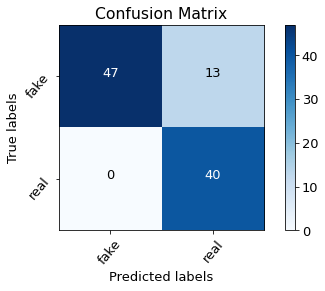

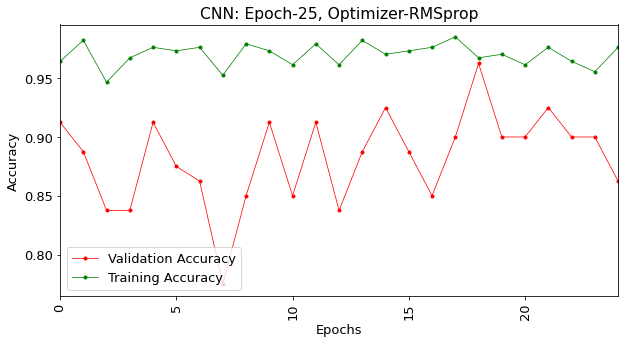

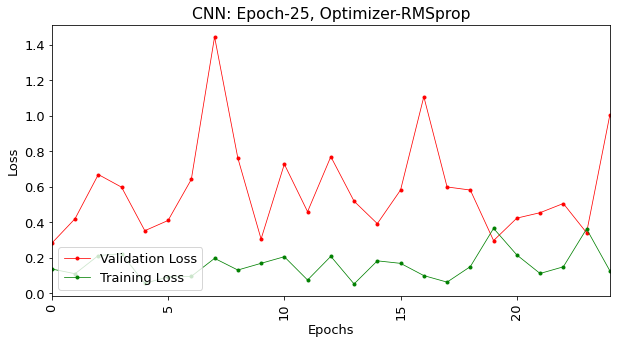

In [31]:
compile_model('RMSprop','sparse_categorical_crossentropy')
history = fit_model_new(25,training_data,validation_data,testing_data,34,20)

#confusion matrix and prediction
prediction= model.predict(x=testing_data,verbose=2)
np.round(prediction)   
cm = confusion_matrix(y_true = testing_data.classes, y_pred = np.argmax(prediction,axis = -1))
cm_plot_labels = ['fake','real']
confusion_matrix_plot(cm = cm, classes = cm_plot_labels, title= 'Confusion Matrix')

print('classification_report:\n',classification_report(testing_data.classes,np.argmax(prediction,axis = -1)))

plot_graph('Accuracy','CNN',25,'RMSprop',history.history['val_accuracy'],history.history['accuracy'],'Validation Accuracy','Training Accuracy',0.00,0.00)
plot_graph('Loss',    'CNN',25,'RMSprop',history.history['val_loss'],history.history['loss'],'Validation Loss','Training Loss',0.00,0.00)

VGG

In [32]:

vgg = VGG16()
vgg_layers = vgg.layers

model = Sequential()
for i in range(len(vgg_layers)-1):
    model.add(vgg_layers[i])

for layers in model.layers:
    layers.trainable = False    
model.add(Dense(2, activation="softmax"))
print(model.summary())

553467904/553467096 [==============================] - 5s 0us/step
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_____________________________________________________

Epoch 1/5
34/34 - 8s - loss: 0.7769 - accuracy: 0.4955 - val_loss: 0.7381 - val_accuracy: 0.5250
Epoch 2/5
34/34 - 8s - loss: 0.6901 - accuracy: 0.5816 - val_loss: 0.7014 - val_accuracy: 0.5125
Epoch 3/5
34/34 - 7s - loss: 0.6318 - accuracy: 0.6235 - val_loss: 0.6753 - val_accuracy: 0.6000
Epoch 4/5
34/34 - 7s - loss: 0.5983 - accuracy: 0.6706 - val_loss: 0.6244 - val_accuracy: 0.6750
Epoch 5/5
34/34 - 7s - loss: 0.5650 - accuracy: 0.7003 - val_loss: 0.5891 - val_accuracy: 0.7000
25/25 - 2s
Confusion Matrix
[[49 11]
 [23 17]]
classification_report:
               precision    recall  f1-score   support

           0       0.68      0.82      0.74        60
           1       0.61      0.42      0.50        40

    accuracy                           0.66       100
   macro avg       0.64      0.62      0.62       100
weighted avg       0.65      0.66      0.65       100



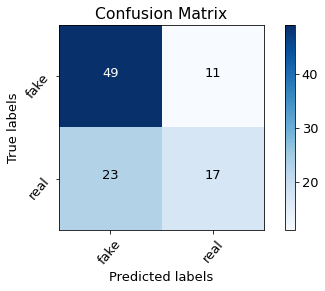

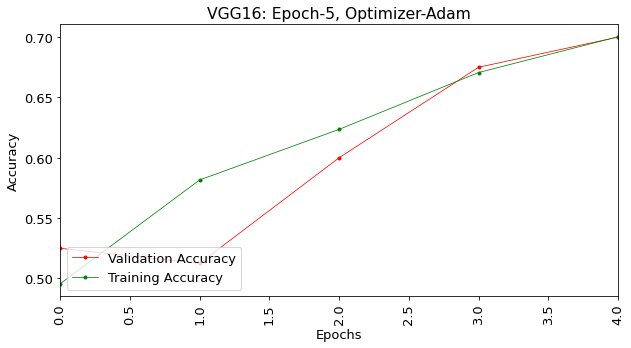

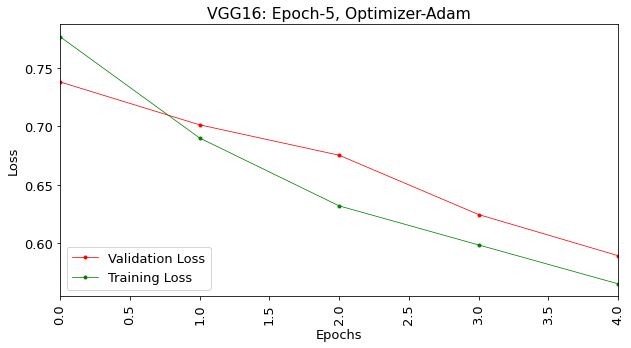

In [33]:
compile_model(Adam,'sparse_categorical_crossentropy')
history = fit_model_new(5,training_data,validation_data,testing_data,34,20)

#confusion matrix and prediction
prediction= model.predict(x=testing_data,verbose=2)
np.round(prediction)   
cm = confusion_matrix(y_true = testing_data.classes, y_pred = np.argmax(prediction,axis = -1))
cm_plot_labels = ['fake','real']
confusion_matrix_plot(cm = cm, classes = cm_plot_labels, title= 'Confusion Matrix')
print('classification_report:\n',classification_report(testing_data.classes,np.argmax(prediction,axis = -1)))

plot_graph('Accuracy','VGG16',5,'Adam',history.history['val_accuracy'],history.history['accuracy'],'Validation Accuracy','Training Accuracy',0.00,0.00)
plot_graph('Loss',    'VGG16',5,'Adam',history.history['val_loss'],history.history['loss'],'Validation Loss','Training Loss',0.00,0.00)

Epoch 1/15
34/34 - 8s - loss: 0.5297 - accuracy: 0.7359 - val_loss: 0.5649 - val_accuracy: 0.7250
Epoch 2/15
34/34 - 7s - loss: 0.5060 - accuracy: 0.7656 - val_loss: 0.5899 - val_accuracy: 0.7125
Epoch 3/15
34/34 - 7s - loss: 0.4966 - accuracy: 0.7626 - val_loss: 0.5357 - val_accuracy: 0.7375
Epoch 4/15
34/34 - 7s - loss: 0.4611 - accuracy: 0.7982 - val_loss: 0.5016 - val_accuracy: 0.7625
Epoch 5/15
34/34 - 8s - loss: 0.4530 - accuracy: 0.8012 - val_loss: 0.5052 - val_accuracy: 0.7625
Epoch 6/15
34/34 - 8s - loss: 0.4206 - accuracy: 0.8279 - val_loss: 0.4656 - val_accuracy: 0.7750
Epoch 7/15
34/34 - 8s - loss: 0.4203 - accuracy: 0.8131 - val_loss: 0.4423 - val_accuracy: 0.7750
Epoch 8/15
34/34 - 7s - loss: 0.4005 - accuracy: 0.8487 - val_loss: 0.4711 - val_accuracy: 0.8000
Epoch 9/15
34/34 - 8s - loss: 0.3866 - accuracy: 0.8457 - val_loss: 0.4528 - val_accuracy: 0.7625
Epoch 10/15
34/34 - 7s - loss: 0.3651 - accuracy: 0.8813 - val_loss: 0.4526 - val_accuracy: 0.7625
Epoch 11/15
34/34 -

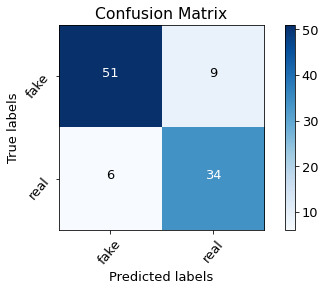

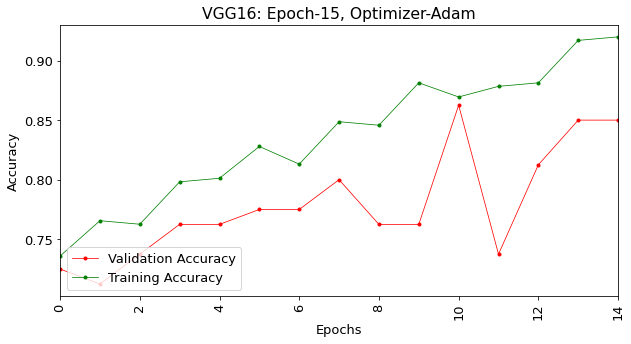

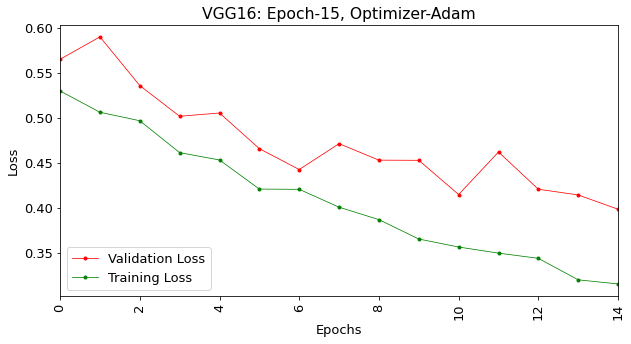

In [34]:
compile_model(Adam,'sparse_categorical_crossentropy')
history = fit_model_new(15,training_data,validation_data,testing_data,34,20)

#confusion matrix and prediction
prediction= model.predict(x=testing_data,verbose=2)
np.round(prediction)   
cm = confusion_matrix(y_true = testing_data.classes, y_pred = np.argmax(prediction,axis = -1))
cm_plot_labels = ['fake','real']
confusion_matrix_plot(cm = cm, classes = cm_plot_labels, title= 'Confusion Matrix')
print('classification_report:\n',classification_report(testing_data.classes,np.argmax(prediction,axis = -1)))

plot_graph('Accuracy','VGG16',15,'Adam',history.history['val_accuracy'],history.history['accuracy'],'Validation Accuracy','Training Accuracy',0.00,0.00)
plot_graph('Loss',    'VGG16',15,'Adam',history.history['val_loss'],history.history['loss'],'Validation Loss','Training Loss',0.00,0.00)

Epoch 1/5
34/34 - 7s - loss: 0.4455 - accuracy: 0.7864 - val_loss: 0.4204 - val_accuracy: 0.7875
Epoch 2/5
34/34 - 7s - loss: 0.4925 - accuracy: 0.7834 - val_loss: 0.6977 - val_accuracy: 0.7000
Epoch 3/5
34/34 - 7s - loss: 0.8852 - accuracy: 0.6944 - val_loss: 1.5118 - val_accuracy: 0.6125
Epoch 4/5
34/34 - 7s - loss: 0.3019 - accuracy: 0.8872 - val_loss: 0.3514 - val_accuracy: 0.8500
Epoch 5/5
34/34 - 7s - loss: 0.2025 - accuracy: 0.9139 - val_loss: 0.3241 - val_accuracy: 0.8375


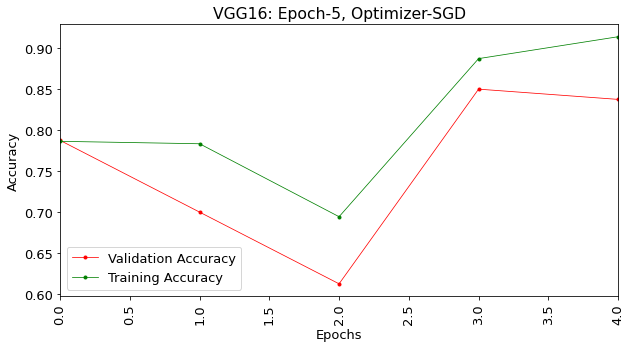

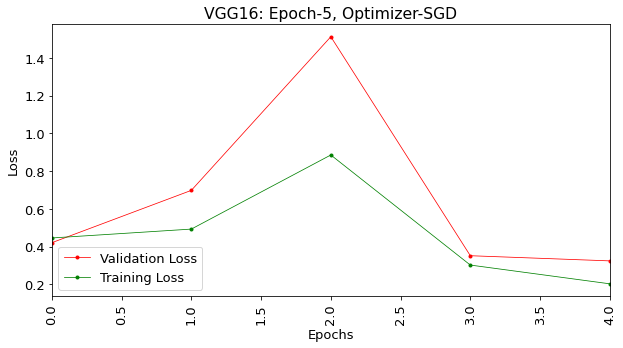

25/25 - 2s
Confusion Matrix
[[52  8]
 [ 3 37]]
classification_report:
               precision    recall  f1-score   support

           0       0.95      0.87      0.90        60
           1       0.82      0.93      0.87        40

    accuracy                           0.89       100
   macro avg       0.88      0.90      0.89       100
weighted avg       0.90      0.89      0.89       100



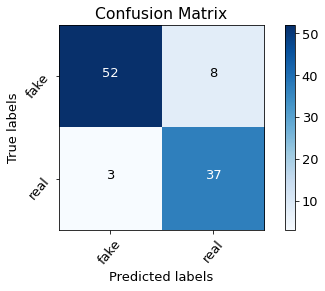

In [35]:
#SGD = SGD(lr=0.0001, momentum=0.9)
compile_model(SGD,'sparse_categorical_crossentropy')
history = fit_model_new(5,training_data,validation_data,testing_data,34,20)
plot_graph('Accuracy','VGG16',5,'SGD',history.history['val_accuracy'],history.history['accuracy'],'Validation Accuracy','Training Accuracy',0.00,0.00)
plot_graph('Loss',    'VGG16',5,'SGD',history.history['val_loss'],history.history['loss'],'Validation Loss','Training Loss',0.00,0.00)

#confusion matrix and prediction
prediction= model.predict(x=testing_data,verbose=2)
np.round(prediction)   
cm = confusion_matrix(y_true = testing_data.classes, y_pred = np.argmax(prediction,axis = -1))
cm_plot_labels = ['fake','real']
confusion_matrix_plot(cm = cm, classes = cm_plot_labels, title= 'Confusion Matrix')

print('classification_report:\n',classification_report(testing_data.classes,np.argmax(prediction,axis = -1)))

Epoch 1/15
34/34 - 8s - loss: 0.1941 - accuracy: 0.9199 - val_loss: 0.4414 - val_accuracy: 0.8500
Epoch 2/15
34/34 - 7s - loss: 0.2034 - accuracy: 0.9110 - val_loss: 0.4502 - val_accuracy: 0.8250
Epoch 3/15
34/34 - 7s - loss: 0.3067 - accuracy: 0.8516 - val_loss: 0.5922 - val_accuracy: 0.8000
Epoch 4/15
34/34 - 7s - loss: 0.1116 - accuracy: 0.9644 - val_loss: 0.3633 - val_accuracy: 0.8500
Epoch 5/15
34/34 - 8s - loss: 0.1810 - accuracy: 0.9199 - val_loss: 0.6360 - val_accuracy: 0.7250
Epoch 6/15
34/34 - 7s - loss: 0.1879 - accuracy: 0.9139 - val_loss: 0.5779 - val_accuracy: 0.8125
Epoch 7/15
34/34 - 7s - loss: 0.1813 - accuracy: 0.9169 - val_loss: 0.4811 - val_accuracy: 0.8375
Epoch 8/15
34/34 - 7s - loss: 0.0959 - accuracy: 0.9674 - val_loss: 0.2748 - val_accuracy: 0.8625
Epoch 9/15
34/34 - 8s - loss: 0.0614 - accuracy: 0.9911 - val_loss: 0.2492 - val_accuracy: 0.8750
Epoch 10/15
34/34 - 7s - loss: 0.0714 - accuracy: 0.9911 - val_loss: 0.3888 - val_accuracy: 0.8625
Epoch 11/15
34/34 -

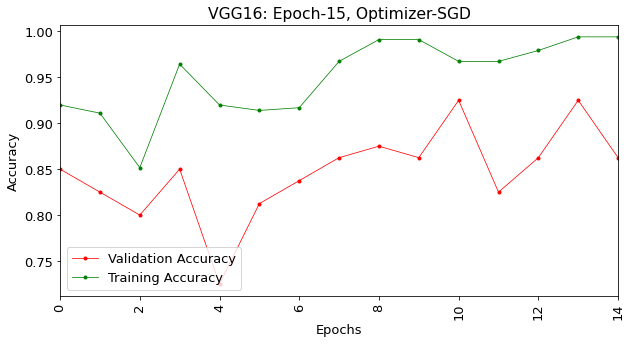

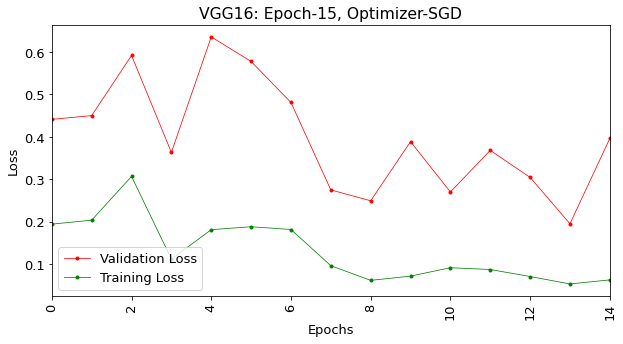

25/25 - 2s
Confusion Matrix
[[44 16]
 [ 3 37]]
classification_report:
               precision    recall  f1-score   support

           0       0.94      0.73      0.82        60
           1       0.70      0.93      0.80        40

    accuracy                           0.81       100
   macro avg       0.82      0.83      0.81       100
weighted avg       0.84      0.81      0.81       100



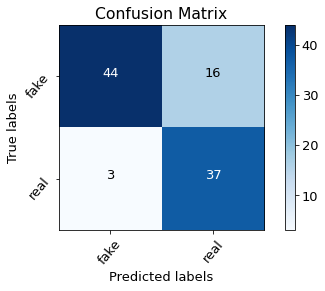

In [36]:
compile_model(SGD,'sparse_categorical_crossentropy')
history = fit_model_new(15,training_data,validation_data,testing_data,34,20)
plot_graph('Accuracy','VGG16',15,'SGD',history.history['val_accuracy'],history.history['accuracy'],'Validation Accuracy','Training Accuracy',0.00,0.00)
plot_graph('Loss',    'VGG16',15,'SGD',history.history['val_loss'],history.history['loss'],'Validation Loss','Training Loss',0.00,0.00)

#confusion matrix and prediction
prediction= model.predict(x=testing_data,verbose=2)
np.round(prediction)   
cm = confusion_matrix(y_true = testing_data.classes, y_pred = np.argmax(prediction,axis = -1))
cm_plot_labels = ['fake','real']
confusion_matrix_plot(cm = cm, classes = cm_plot_labels, title= 'Confusion Matrix')

print('classification_report:\n',classification_report(testing_data.classes,np.argmax(prediction,axis = -1)))

Epoch 1/5
34/34 - 8s - loss: 0.1661 - accuracy: 0.9377 - val_loss: 0.4050 - val_accuracy: 0.8500
Epoch 2/5
34/34 - 8s - loss: 0.0996 - accuracy: 0.9733 - val_loss: 0.4345 - val_accuracy: 0.8375
Epoch 3/5
34/34 - 7s - loss: 0.0968 - accuracy: 0.9703 - val_loss: 0.3303 - val_accuracy: 0.8750
Epoch 4/5
34/34 - 7s - loss: 0.0797 - accuracy: 0.9763 - val_loss: 0.3128 - val_accuracy: 0.8875
Epoch 5/5
34/34 - 7s - loss: 0.0748 - accuracy: 0.9792 - val_loss: 0.3891 - val_accuracy: 0.8500
25/25 - 2s
Confusion Matrix
[[59  1]
 [11 29]]
classification_report:
               precision    recall  f1-score   support

           0       0.84      0.98      0.91        60
           1       0.97      0.72      0.83        40

    accuracy                           0.88       100
   macro avg       0.90      0.85      0.87       100
weighted avg       0.89      0.88      0.88       100



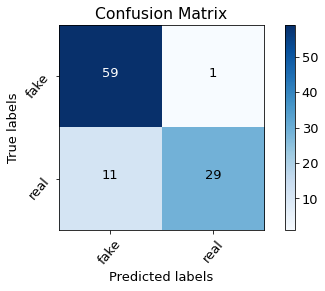

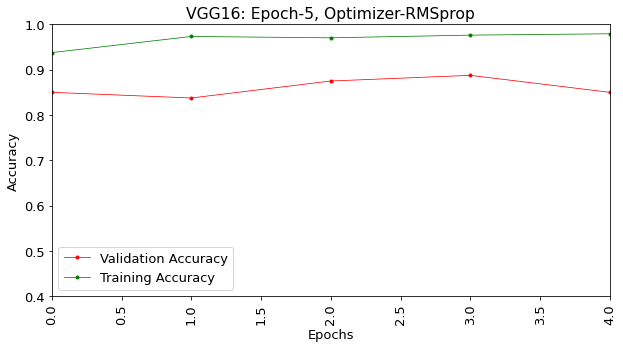

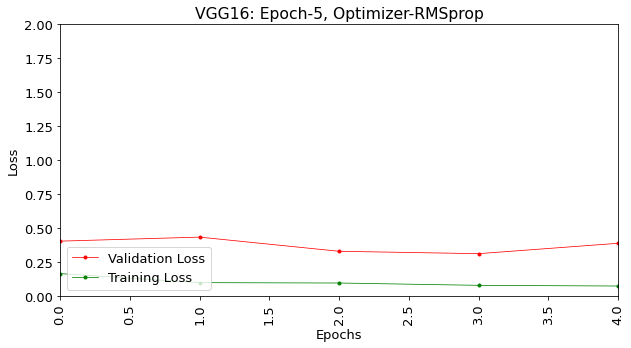

In [37]:
compile_model('RMSprop','sparse_categorical_crossentropy')
history = fit_model_new(5,training_data,validation_data,testing_data,34,20)

#confusion matrix and prediction
prediction= model.predict(x=testing_data,verbose=2)
np.round(prediction)   
cm = confusion_matrix(y_true = testing_data.classes, y_pred = np.argmax(prediction,axis = -1))
cm_plot_labels = ['fake','real']
confusion_matrix_plot(cm = cm, classes = cm_plot_labels, title= 'Confusion Matrix')

print('classification_report:\n',classification_report(testing_data.classes,np.argmax(prediction,axis = -1)))

plot_graph('Accuracy','VGG16',5,'RMSprop',history.history['val_accuracy'],history.history['accuracy'],'Validation Accuracy','Training Accuracy',1.00,0.400)
plot_graph('Loss',    'VGG16',5,'RMSprop',history.history['val_loss'],history.history['loss'],'Validation Loss','Training Loss',2.00,0.00)


Epoch 1/15
34/34 - 8s - loss: 0.1221 - accuracy: 0.9735 - val_loss: 0.5379 - val_accuracy: 0.8250
Epoch 2/15
34/34 - 7s - loss: 0.0740 - accuracy: 0.9792 - val_loss: 0.2653 - val_accuracy: 0.8625
Epoch 3/15
34/34 - 7s - loss: 0.0335 - accuracy: 0.9941 - val_loss: 0.4286 - val_accuracy: 0.8250
Epoch 4/15
34/34 - 8s - loss: 0.0822 - accuracy: 0.9733 - val_loss: 0.3352 - val_accuracy: 0.8625
Epoch 5/15
34/34 - 8s - loss: 0.0479 - accuracy: 0.9852 - val_loss: 0.2653 - val_accuracy: 0.8875
Epoch 6/15
34/34 - 7s - loss: 0.0613 - accuracy: 0.9822 - val_loss: 0.3188 - val_accuracy: 0.8500
Epoch 7/15
34/34 - 7s - loss: 0.0347 - accuracy: 0.9941 - val_loss: 0.3955 - val_accuracy: 0.8750
Epoch 8/15
34/34 - 7s - loss: 0.0289 - accuracy: 0.9881 - val_loss: 0.2516 - val_accuracy: 0.8625
Epoch 9/15
34/34 - 7s - loss: 0.0608 - accuracy: 0.9733 - val_loss: 0.3364 - val_accuracy: 0.8750
Epoch 10/15
34/34 - 8s - loss: 0.0377 - accuracy: 0.9822 - val_loss: 0.3444 - val_accuracy: 0.8500
Epoch 11/15
34/34 -

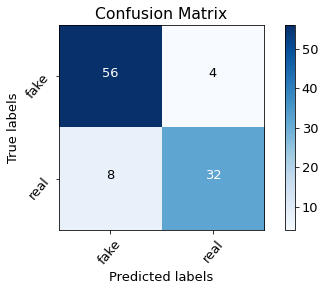

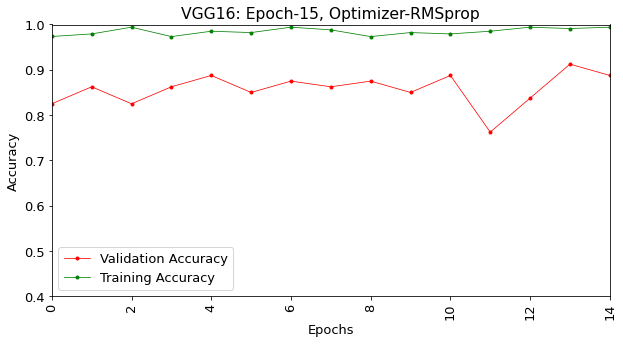

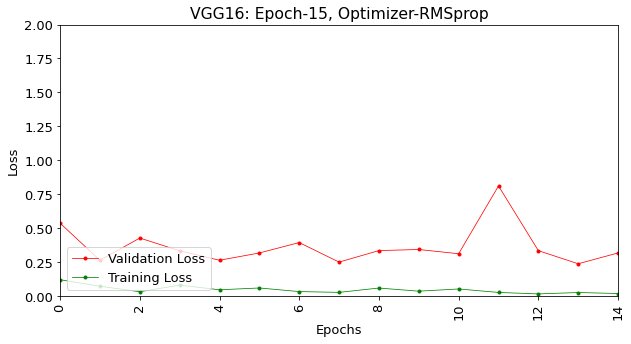

In [38]:
compile_model('RMSprop','sparse_categorical_crossentropy')
history = fit_model_new(15,training_data,validation_data,testing_data,34,20)

#confusion matrix and prediction
prediction= model.predict(x=testing_data,verbose=2)
np.round(prediction)   
cm = confusion_matrix(y_true = testing_data.classes, y_pred = np.argmax(prediction,axis = -1))
cm_plot_labels = ['fake','real']
confusion_matrix_plot(cm = cm, classes = cm_plot_labels, title= 'Confusion Matrix')

print('classification_report:\n',classification_report(testing_data.classes,np.argmax(prediction,axis = -1)))

plot_graph('Accuracy','VGG16',15,'RMSprop',history.history['val_accuracy'],history.history['accuracy'],'Validation Accuracy','Training Accuracy',1.00,0.400)
plot_graph('Loss',    'VGG16',15,'RMSprop',history.history['val_loss'],history.history['loss'],'Validation Loss','Training Loss',2.00,0.00)


Epoch 1/35
34/34 - 7s - loss: 0.0377 - accuracy: 0.9881 - val_loss: 0.3662 - val_accuracy: 0.8500
Epoch 2/35
34/34 - 7s - loss: 0.0179 - accuracy: 0.9970 - val_loss: 0.2602 - val_accuracy: 0.8625
Epoch 3/35
34/34 - 8s - loss: 0.0158 - accuracy: 0.9970 - val_loss: 0.2917 - val_accuracy: 0.9250
Epoch 4/35
34/34 - 8s - loss: 0.0298 - accuracy: 0.9852 - val_loss: 0.2365 - val_accuracy: 0.9125
Epoch 5/35
34/34 - 7s - loss: 0.0263 - accuracy: 0.9881 - val_loss: 0.2723 - val_accuracy: 0.8875
Epoch 6/35
34/34 - 7s - loss: 0.0048 - accuracy: 1.0000 - val_loss: 0.1825 - val_accuracy: 0.9250
Epoch 7/35
34/34 - 8s - loss: 0.0109 - accuracy: 1.0000 - val_loss: 1.0818 - val_accuracy: 0.7250
Epoch 8/35
34/34 - 7s - loss: 0.0137 - accuracy: 0.9941 - val_loss: 0.2685 - val_accuracy: 0.9125
Epoch 9/35
34/34 - 7s - loss: 0.0137 - accuracy: 0.9970 - val_loss: 0.3933 - val_accuracy: 0.8875
Epoch 10/35
34/34 - 7s - loss: 0.0157 - accuracy: 0.9941 - val_loss: 0.2374 - val_accuracy: 0.8750
Epoch 11/35
34/34 -

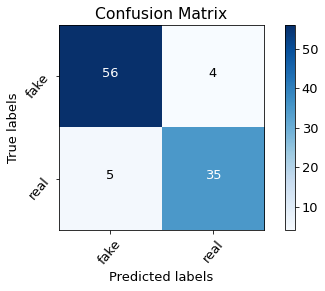

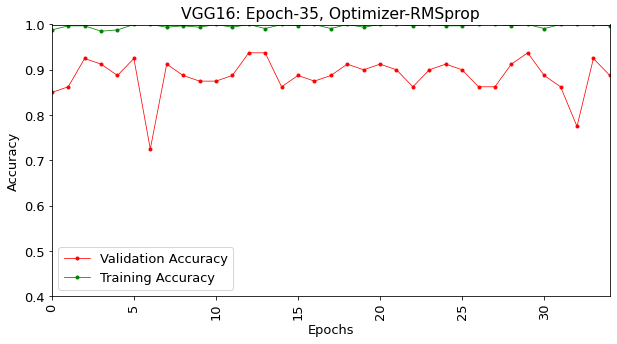

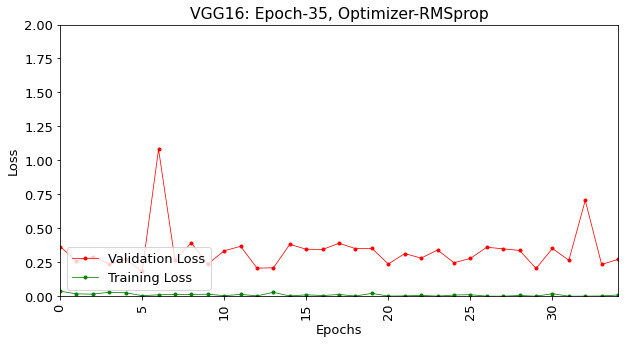

In [39]:
compile_model('RMSprop','sparse_categorical_crossentropy')
history = fit_model_new(35,training_data,validation_data,testing_data,34,20)

#confusion matrix and prediction
prediction= model.predict(x=testing_data,verbose=2)
np.round(prediction)   
cm = confusion_matrix(y_true = testing_data.classes, y_pred = np.argmax(prediction,axis = -1))
cm_plot_labels = ['fake','real']
confusion_matrix_plot(cm = cm, classes = cm_plot_labels, title= 'Confusion Matrix')

print('classification_report:\n',classification_report(testing_data.classes,np.argmax(prediction,axis = -1)))

plot_graph('Accuracy','VGG16',35,'RMSprop',history.history['val_accuracy'],history.history['accuracy'],'Validation Accuracy','Training Accuracy',1.00,0.400)
plot_graph('Loss',    'VGG16',35,'RMSprop',history.history['val_loss'],history.history['loss'],'Validation Loss','Training Loss',2.00,0.00)


### Inceptionv3

In [40]:
from keras.layers import  GlobalAveragePooling2D

basic_model = Sequential()
basic_model = InceptionV3(weights = 'imagenet', include_top = False, input_shape=(size, size, 3))
base_output = basic_model.output
base_output = GlobalAveragePooling2D()(base_output)
base_output = Dense(512, activation='relu')(base_output)
predictions = Dense(2, activation='softmax')(base_output)

model = Model(inputs = basic_model.input, outputs = predictions)

for layer in basic_model.layers:
    layer.trainable = False
model.summary()

87916544/87910968 [==============================] - 1s 0us/step
Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d_28 (Conv2D)              (None, 111, 111, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d_28[0][0]                  
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
______________________

Epoch 1/5
34/34 - 9s - loss: 27.4577 - accuracy: 0.5282 - val_loss: 10.4936 - val_accuracy: 0.6125
Epoch 2/5
34/34 - 7s - loss: 8.0549 - accuracy: 0.6083 - val_loss: 3.4972 - val_accuracy: 0.7250
Epoch 3/5
34/34 - 7s - loss: 5.7662 - accuracy: 0.6291 - val_loss: 5.9538 - val_accuracy: 0.6500
Epoch 4/5
34/34 - 7s - loss: 4.5039 - accuracy: 0.6973 - val_loss: 0.9655 - val_accuracy: 0.8750
Epoch 5/5
34/34 - 7s - loss: 3.0281 - accuracy: 0.7092 - val_loss: 2.1288 - val_accuracy: 0.7125
25/25 - 2s
Confusion Matrix
[[55  5]
 [19 21]]
classification_report:
               precision    recall  f1-score   support

           0       0.74      0.92      0.82        60
           1       0.81      0.53      0.64        40

    accuracy                           0.76       100
   macro avg       0.78      0.72      0.73       100
weighted avg       0.77      0.76      0.75       100



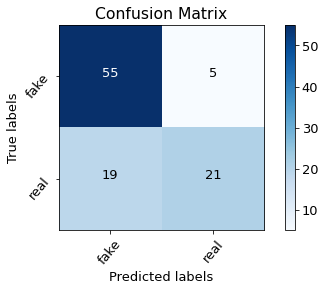

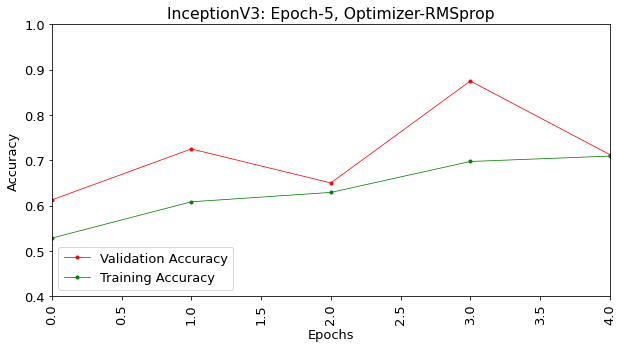

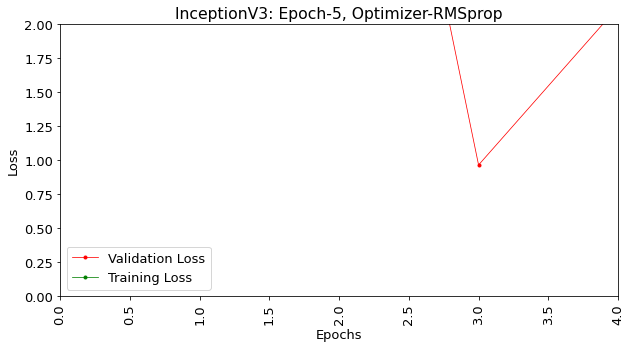

In [41]:
compile_model('RMSprop','sparse_categorical_crossentropy')
history = fit_model_new(5,training_data,validation_data,testing_data,34,20)

#confusion matrix and prediction
prediction= model.predict(x=testing_data,verbose=2)
np.round(prediction)   
cm = confusion_matrix(y_true = testing_data.classes, y_pred = np.argmax(prediction,axis = -1))
cm_plot_labels = ['fake','real']
confusion_matrix_plot(cm = cm, classes = cm_plot_labels, title= 'Confusion Matrix')
print('classification_report:\n',classification_report(testing_data.classes,np.argmax(prediction,axis = -1)))

plot_graph('Accuracy','InceptionV3',5,'RMSprop',history.history['val_accuracy'],history.history['accuracy'],'Validation Accuracy','Training Accuracy',1.00,0.400)
plot_graph('Loss',    'InceptionV3',5,'RMSprop',history.history['val_loss'],history.history['loss'],'Validation Loss','Training Loss',2.00,0.00)


Epoch 1/15
34/34 - 9s - loss: 3.8737 - accuracy: 0.6973 - val_loss: 0.8833 - val_accuracy: 0.8375
Epoch 2/15
34/34 - 8s - loss: 1.6905 - accuracy: 0.7270 - val_loss: 0.9532 - val_accuracy: 0.7875
Epoch 3/15
34/34 - 7s - loss: 1.7678 - accuracy: 0.7300 - val_loss: 2.0957 - val_accuracy: 0.6875
Epoch 4/15
34/34 - 7s - loss: 1.4610 - accuracy: 0.7567 - val_loss: 0.2176 - val_accuracy: 0.9125
Epoch 5/15
34/34 - 7s - loss: 1.0888 - accuracy: 0.7804 - val_loss: 1.0792 - val_accuracy: 0.7875
Epoch 6/15
34/34 - 7s - loss: 0.9501 - accuracy: 0.7953 - val_loss: 0.5910 - val_accuracy: 0.8125
Epoch 7/15
34/34 - 8s - loss: 0.7136 - accuracy: 0.7923 - val_loss: 1.5319 - val_accuracy: 0.7000
Epoch 8/15
34/34 - 7s - loss: 0.6395 - accuracy: 0.7864 - val_loss: 0.3683 - val_accuracy: 0.8375
Epoch 9/15
34/34 - 8s - loss: 0.6071 - accuracy: 0.7685 - val_loss: 1.7592 - val_accuracy: 0.5250
Epoch 10/15
34/34 - 7s - loss: 0.5652 - accuracy: 0.7647 - val_loss: 0.2929 - val_accuracy: 0.8750
Epoch 11/15
34/34 -

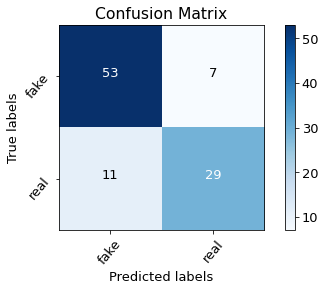

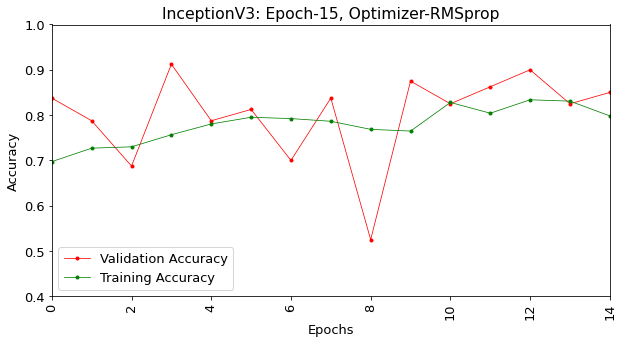

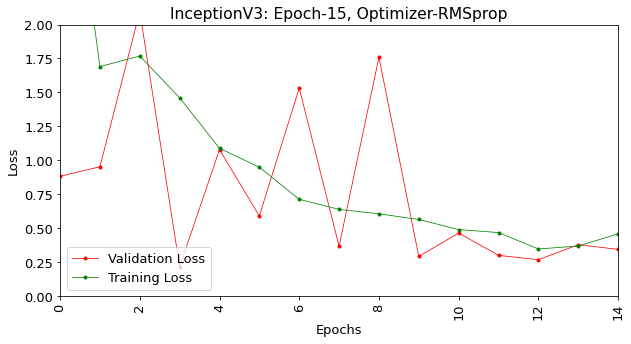

In [42]:
compile_model('RMSprop','sparse_categorical_crossentropy')
history = fit_model_new(15,training_data,validation_data,testing_data,34,20)

#confusion matrix and prediction
prediction= model.predict(x=testing_data,verbose=2)
np.round(prediction)   
cm = confusion_matrix(y_true = testing_data.classes, y_pred = np.argmax(prediction,axis = -1))
cm_plot_labels = ['fake','real']
confusion_matrix_plot(cm = cm, classes = cm_plot_labels, title= 'Confusion Matrix')
print('classification_report:\n',classification_report(testing_data.classes,np.argmax(prediction,axis = -1)))

plot_graph('Accuracy','InceptionV3',15,'RMSprop',history.history['val_accuracy'],history.history['accuracy'],'Validation Accuracy','Training Accuracy',1.00,0.400)
plot_graph('Loss',    'InceptionV3',15,'RMSprop',history.history['val_loss'],history.history['loss'],'Validation Loss','Training Loss',2.00,0.00)


Epoch 1/5
34/34 - 9s - loss: 0.2998 - accuracy: 0.8516 - val_loss: 0.4310 - val_accuracy: 0.8000
Epoch 2/5
34/34 - 7s - loss: 0.2990 - accuracy: 0.8576 - val_loss: 0.2511 - val_accuracy: 0.8875
Epoch 3/5
34/34 - 8s - loss: 0.1813 - accuracy: 0.9228 - val_loss: 0.2829 - val_accuracy: 0.9125
Epoch 4/5
34/34 - 7s - loss: 0.2919 - accuracy: 0.8694 - val_loss: 0.4031 - val_accuracy: 0.8375
Epoch 5/5
34/34 - 7s - loss: 0.1918 - accuracy: 0.9228 - val_loss: 0.3181 - val_accuracy: 0.8500
25/25 - 2s
Confusion Matrix
[[46 14]
 [ 8 32]]
classification_report:
               precision    recall  f1-score   support

           0       0.85      0.77      0.81        60
           1       0.70      0.80      0.74        40

    accuracy                           0.78       100
   macro avg       0.77      0.78      0.78       100
weighted avg       0.79      0.78      0.78       100



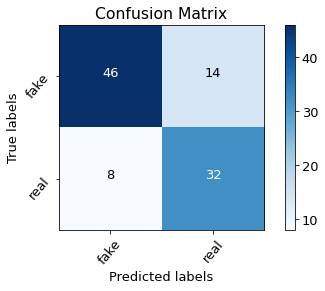

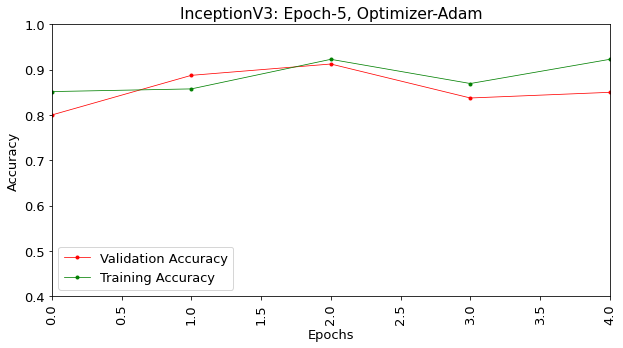

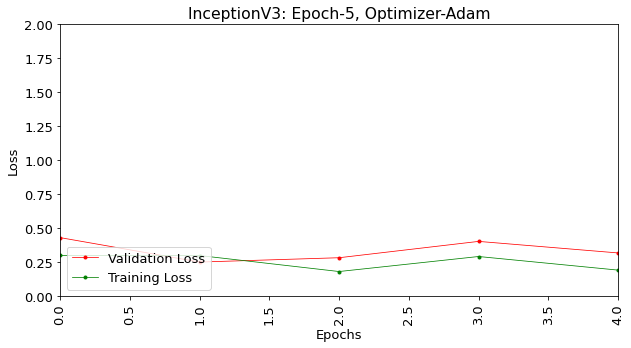

In [43]:
compile_model('Adam','sparse_categorical_crossentropy')
history = fit_model_new(5,training_data,validation_data,testing_data,34,20)

#confusion matrix and prediction
prediction= model.predict(x=testing_data,verbose=2)
np.round(prediction)   
cm = confusion_matrix(y_true = testing_data.classes, y_pred = np.argmax(prediction,axis = -1))
cm_plot_labels = ['fake','real']
confusion_matrix_plot(cm = cm, classes = cm_plot_labels, title= 'Confusion Matrix')
print('classification_report:\n',classification_report(testing_data.classes,np.argmax(prediction,axis = -1)))

plot_graph('Accuracy','InceptionV3',5,'Adam',history.history['val_accuracy'],history.history['accuracy'],'Validation Accuracy','Training Accuracy',1.00,0.400)
plot_graph('Loss',    'InceptionV3',5,'Adam',history.history['val_loss'],history.history['loss'],'Validation Loss','Training Loss',2.00,0.00)


Epoch 1/15
34/34 - 9s - loss: 0.2692 - accuracy: 0.8991 - val_loss: 0.3726 - val_accuracy: 0.8750
Epoch 2/15
34/34 - 8s - loss: 0.1404 - accuracy: 0.9377 - val_loss: 0.3540 - val_accuracy: 0.8500
Epoch 3/15
34/34 - 7s - loss: 0.1275 - accuracy: 0.9496 - val_loss: 0.2524 - val_accuracy: 0.9250
Epoch 4/15
34/34 - 7s - loss: 0.1160 - accuracy: 0.9496 - val_loss: 0.1726 - val_accuracy: 0.8875
Epoch 5/15
34/34 - 7s - loss: 0.1385 - accuracy: 0.9436 - val_loss: 0.5310 - val_accuracy: 0.8250
Epoch 6/15
34/34 - 7s - loss: 0.1223 - accuracy: 0.9555 - val_loss: 0.3799 - val_accuracy: 0.8875
Epoch 7/15
34/34 - 7s - loss: 0.0984 - accuracy: 0.9674 - val_loss: 0.3603 - val_accuracy: 0.8750
Epoch 8/15
34/34 - 7s - loss: 0.1392 - accuracy: 0.9288 - val_loss: 0.5794 - val_accuracy: 0.8250
Epoch 9/15
34/34 - 7s - loss: 0.1201 - accuracy: 0.9466 - val_loss: 0.3551 - val_accuracy: 0.9125
Epoch 10/15
34/34 - 8s - loss: 0.0769 - accuracy: 0.9674 - val_loss: 0.2671 - val_accuracy: 0.9000
Epoch 11/15
34/34 -

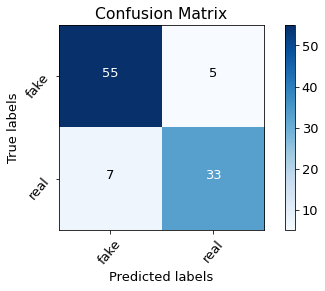

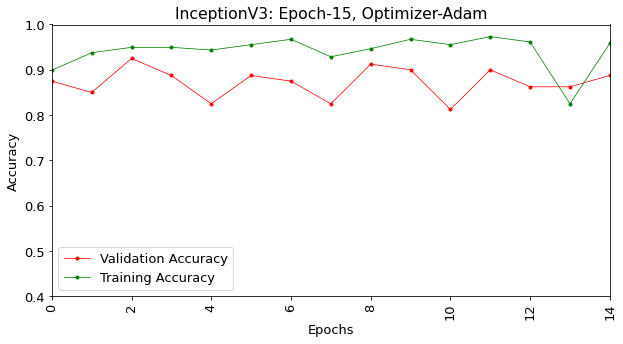

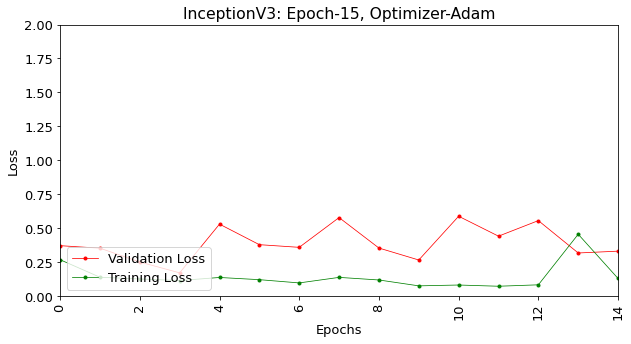

In [44]:
compile_model('Adam','sparse_categorical_crossentropy')
history = fit_model_new(15,training_data,validation_data,testing_data,34,20)

#confusion matrix and prediction
prediction= model.predict(x=testing_data,verbose=2)
np.round(prediction)   
cm = confusion_matrix(y_true = testing_data.classes, y_pred = np.argmax(prediction,axis = -1))
cm_plot_labels = ['fake','real']
confusion_matrix_plot(cm = cm, classes = cm_plot_labels, title= 'Confusion Matrix')
print('classification_report:\n',classification_report(testing_data.classes,np.argmax(prediction,axis = -1)))

plot_graph('Accuracy','InceptionV3',15,'Adam',history.history['val_accuracy'],history.history['accuracy'],'Validation Accuracy','Training Accuracy',1.00,0.400)
plot_graph('Loss',    'InceptionV3',15,'Adam',history.history['val_loss'],history.history['loss'],'Validation Loss','Training Loss',2.00,0.00)


Epoch 1/5
34/34 - 9s - loss: 0.0522 - accuracy: 0.9822 - val_loss: 0.8869 - val_accuracy: 0.8375
Epoch 2/5
34/34 - 8s - loss: 0.2125 - accuracy: 0.9169 - val_loss: 0.3849 - val_accuracy: 0.9250
Epoch 3/5
34/34 - 7s - loss: 0.2942 - accuracy: 0.8902 - val_loss: 0.3392 - val_accuracy: 0.9000
Epoch 4/5
34/34 - 7s - loss: 0.1710 - accuracy: 0.9258 - val_loss: 0.3715 - val_accuracy: 0.8875
Epoch 5/5
34/34 - 7s - loss: 0.2076 - accuracy: 0.9021 - val_loss: 0.5214 - val_accuracy: 0.8125
25/25 - 2s
Confusion Matrix
[[51  9]
 [ 9 31]]
classification_report:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85        60
           1       0.78      0.78      0.78        40

    accuracy                           0.82       100
   macro avg       0.81      0.81      0.81       100
weighted avg       0.82      0.82      0.82       100



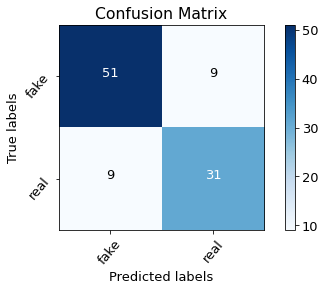

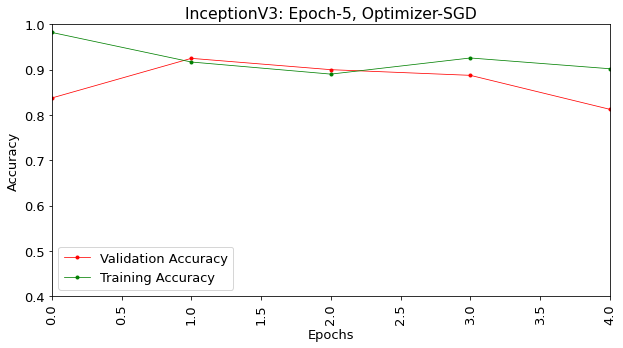

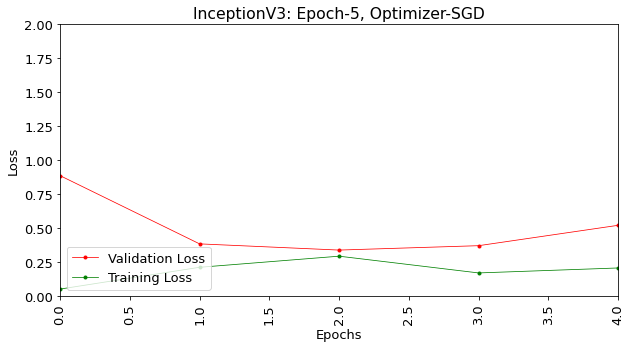

In [45]:
compile_model(SGD,'sparse_categorical_crossentropy')
history = fit_model_new(5,training_data,validation_data,testing_data,34,20)

#confusion matrix and prediction
prediction= model.predict(x=testing_data,verbose=2)
np.round(prediction)   
cm = confusion_matrix(y_true = testing_data.classes, y_pred = np.argmax(prediction,axis = -1))
cm_plot_labels = ['fake','real']
confusion_matrix_plot(cm = cm, classes = cm_plot_labels, title= 'Confusion Matrix')
print('classification_report:\n',classification_report(testing_data.classes,np.argmax(prediction,axis = -1)))

plot_graph('Accuracy','InceptionV3',5,'SGD',history.history['val_accuracy'],history.history['accuracy'],'Validation Accuracy','Training Accuracy',1.00,0.400)
plot_graph('Loss',    'InceptionV3',5,'SGD',history.history['val_loss'],history.history['loss'],'Validation Loss','Training Loss',2.00,0.00)


Epoch 1/15
34/34 - 9s - loss: 0.2996 - accuracy: 0.8338 - val_loss: 0.3273 - val_accuracy: 0.8625
Epoch 2/15
34/34 - 7s - loss: 0.5362 - accuracy: 0.7864 - val_loss: 0.5147 - val_accuracy: 0.7375
Epoch 3/15
34/34 - 7s - loss: 0.5977 - accuracy: 0.7300 - val_loss: 0.5671 - val_accuracy: 0.7750
Epoch 4/15
34/34 - 8s - loss: 0.5509 - accuracy: 0.7834 - val_loss: 0.6031 - val_accuracy: 0.7875
Epoch 5/15
34/34 - 7s - loss: 0.4839 - accuracy: 0.8309 - val_loss: 0.5438 - val_accuracy: 0.7375
Epoch 6/15
34/34 - 7s - loss: 0.4204 - accuracy: 0.8427 - val_loss: 0.4972 - val_accuracy: 0.8000
Epoch 7/15
34/34 - 7s - loss: 0.4870 - accuracy: 0.7596 - val_loss: 0.6603 - val_accuracy: 0.7125
Epoch 8/15
34/34 - 8s - loss: 0.5212 - accuracy: 0.7507 - val_loss: 0.5848 - val_accuracy: 0.7750
Epoch 9/15
34/34 - 7s - loss: 0.4981 - accuracy: 0.7893 - val_loss: 0.6316 - val_accuracy: 0.7000
Epoch 10/15
34/34 - 7s - loss: 0.6112 - accuracy: 0.6469 - val_loss: 0.6621 - val_accuracy: 0.6000
Epoch 11/15
34/34 -

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


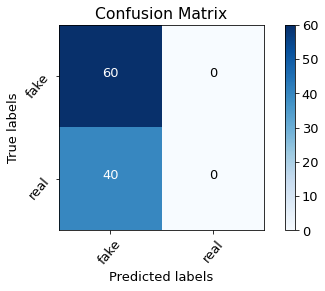

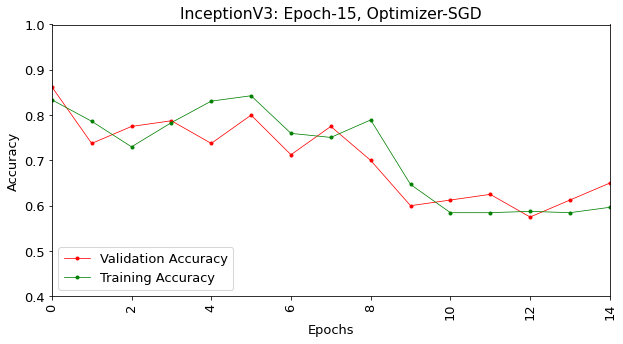

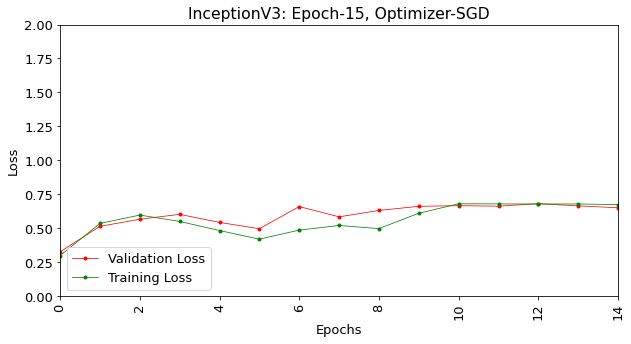

In [46]:
compile_model(SGD,'sparse_categorical_crossentropy')
history = fit_model_new(15,training_data,validation_data,testing_data,34,20)

#confusion matrix and prediction
prediction= model.predict(x=testing_data,verbose=2)
np.round(prediction)   
cm = confusion_matrix(y_true = testing_data.classes, y_pred = np.argmax(prediction,axis = -1))
cm_plot_labels = ['fake','real']
confusion_matrix_plot(cm = cm, classes = cm_plot_labels, title= 'Confusion Matrix')
print('classification_report:\n',classification_report(testing_data.classes,np.argmax(prediction,axis = -1)))

plot_graph('Accuracy','InceptionV3',15,'SGD',history.history['val_accuracy'],history.history['accuracy'],'Validation Accuracy','Training Accuracy',1.00,0.400)
plot_graph('Loss',    'InceptionV3',15,'SGD',history.history['val_loss'],history.history['loss'],'Validation Loss','Training Loss',2.00,0.00)


### CNN-2

In [47]:
model = Sequential()
model.add(Conv2D(16, kernel_size=(3,3), activation='relu',padding='same', input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=(2,2), strides=2))
model.add(Dropout(0.50))

model.add(Conv2D(32, kernel_size=(3,3), activation='relu',padding='same'))
model.add(Conv2D(32, kernel_size=(3,3), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2))
#model.add(Dropout(0.50))

model.add(Conv2D(64, kernel_size=(3,3), activation='relu',padding='same'))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2))
#model.add(Dropout(0.50))

model.add(Conv2D(128, kernel_size=(3,3), activation='relu',padding='same'))
model.add(Conv2D(128, kernel_size=(3,3), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2))
#model.add(Dropout(0.50))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu',padding='same'))
model.add(Conv2D(256, kernel_size=(3,3), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2))
#model.add(Dropout(0.50))

model.add(Flatten())
model.add(Dense(2, activation='softmax'))

print(model.summary())

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_122 (Conv2D)          (None, 224, 224, 16)      448       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 112, 112, 16)      0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_123 (Conv2D)          (None, 112, 112, 32)      4640      
_________________________________________________________________
conv2d_124 (Conv2D)          (None, 112, 112, 32)      9248      
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_125 (Conv2D)          (None, 56, 56, 64)       

Epoch 1/15
34/34 - 8s - loss: 7.4451 - accuracy: 0.4926 - val_loss: 0.6810 - val_accuracy: 0.5750
Epoch 2/15
34/34 - 7s - loss: 0.6776 - accuracy: 0.5994 - val_loss: 0.6785 - val_accuracy: 0.6250
Epoch 3/15
34/34 - 7s - loss: 0.6821 - accuracy: 0.5875 - val_loss: 0.6832 - val_accuracy: 0.5625
Epoch 4/15
34/34 - 7s - loss: 0.6864 - accuracy: 0.5846 - val_loss: 0.6842 - val_accuracy: 0.5625
Epoch 5/15
34/34 - 8s - loss: 0.6769 - accuracy: 0.5608 - val_loss: 0.6882 - val_accuracy: 0.5625
Epoch 6/15
34/34 - 7s - loss: 0.6706 - accuracy: 0.5935 - val_loss: 0.6884 - val_accuracy: 0.5750
Epoch 7/15
34/34 - 7s - loss: 0.6870 - accuracy: 0.5935 - val_loss: 0.6713 - val_accuracy: 0.6250
Epoch 8/15
34/34 - 7s - loss: 0.6790 - accuracy: 0.5816 - val_loss: 0.6846 - val_accuracy: 0.5375
Epoch 9/15
34/34 - 7s - loss: 0.6603 - accuracy: 0.6024 - val_loss: 0.7287 - val_accuracy: 0.5875
Epoch 10/15
34/34 - 7s - loss: 0.6764 - accuracy: 0.5846 - val_loss: 0.7021 - val_accuracy: 0.5625
Epoch 11/15
34/34 -

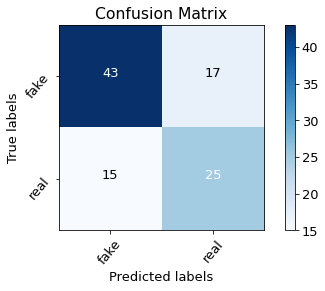

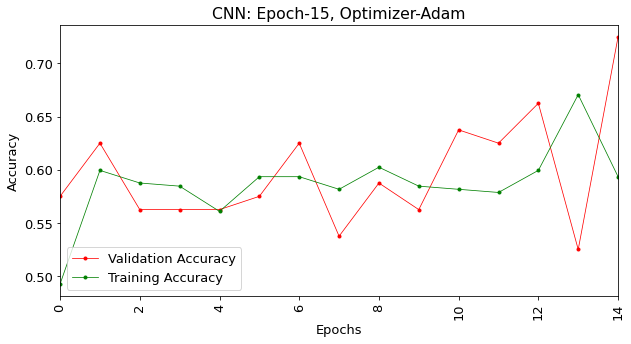

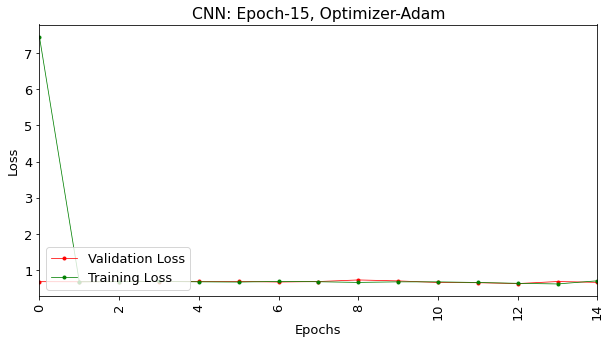

In [48]:
compile_model('Adam','sparse_categorical_crossentropy')
history = fit_model_new(15,training_data,validation_data,testing_data,34,20)

#confusion matrix and prediction
prediction= model.predict(x=testing_data,verbose=2)
np.round(prediction)   
cm = confusion_matrix(y_true = testing_data.classes, y_pred = np.argmax(prediction,axis = -1))
cm_plot_labels = ['fake','real']
confusion_matrix_plot(cm = cm, classes = cm_plot_labels, title= 'Confusion Matrix')
print('classification_report:\n',classification_report(testing_data.classes,np.argmax(prediction,axis = -1)))

plot_graph('Accuracy','CNN',15,'Adam',history.history['val_accuracy'],history.history['accuracy'],'Validation Accuracy','Training Accuracy',0.00,0.000)
plot_graph('Loss',    'CNN',15,'Adam',history.history['val_loss'],history.history['loss'],'Validation Loss','Training Loss',0.00,0.00)


Epoch 1/25
34/34 - 7s - loss: 0.5604 - accuracy: 0.7122 - val_loss: 0.5070 - val_accuracy: 0.8375
Epoch 2/25
34/34 - 7s - loss: 0.4173 - accuracy: 0.8131 - val_loss: 0.4455 - val_accuracy: 0.8250
Epoch 3/25
34/34 - 7s - loss: 0.3697 - accuracy: 0.8338 - val_loss: 0.3447 - val_accuracy: 0.8500
Epoch 4/25
34/34 - 8s - loss: 0.3628 - accuracy: 0.8368 - val_loss: 0.4763 - val_accuracy: 0.8250
Epoch 5/25
34/34 - 7s - loss: 0.3086 - accuracy: 0.8843 - val_loss: 0.2815 - val_accuracy: 0.8875
Epoch 6/25
34/34 - 7s - loss: 0.2666 - accuracy: 0.8991 - val_loss: 0.4217 - val_accuracy: 0.8125
Epoch 7/25
34/34 - 7s - loss: 0.2272 - accuracy: 0.9050 - val_loss: 0.3607 - val_accuracy: 0.8250
Epoch 8/25
34/34 - 7s - loss: 0.1554 - accuracy: 0.9585 - val_loss: 0.3996 - val_accuracy: 0.8750
Epoch 9/25
34/34 - 7s - loss: 0.1567 - accuracy: 0.9466 - val_loss: 0.2681 - val_accuracy: 0.8750
Epoch 10/25
34/34 - 7s - loss: 0.1176 - accuracy: 0.9614 - val_loss: 0.2109 - val_accuracy: 0.9250
Epoch 11/25
34/34 -

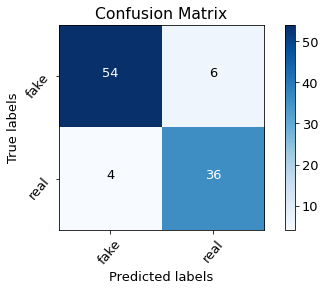

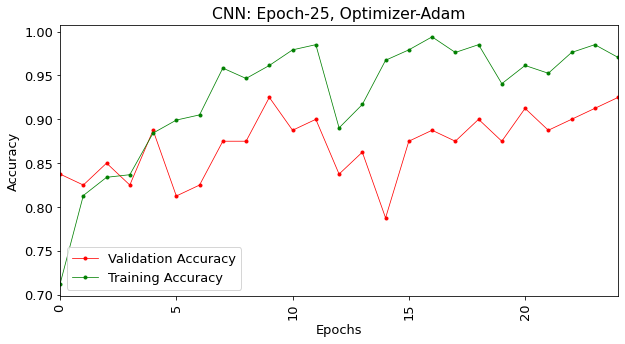

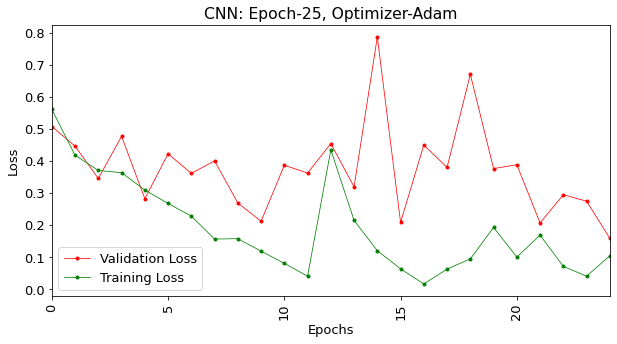

In [49]:
compile_model('Adam','sparse_categorical_crossentropy')
history = fit_model_new(25,training_data,validation_data,testing_data,34,20)

#confusion matrix and prediction
prediction= model.predict(x=testing_data,verbose=2)
np.round(prediction)   
cm = confusion_matrix(y_true = testing_data.classes, y_pred = np.argmax(prediction,axis = -1))
cm_plot_labels = ['fake','real']
confusion_matrix_plot(cm = cm, classes = cm_plot_labels, title= 'Confusion Matrix')
print('classification_report:\n',classification_report(testing_data.classes,np.argmax(prediction,axis = -1)))

plot_graph('Accuracy','CNN',25,'Adam',history.history['val_accuracy'],history.history['accuracy'],'Validation Accuracy','Training Accuracy',0.00,0.000)
plot_graph('Loss',    'CNN',25,'Adam',history.history['val_loss'],history.history['loss'],'Validation Loss','Training Loss',0.00,0.00)


Epoch 1/15
34/34 - 7s - loss: 0.0627 - accuracy: 0.9792 - val_loss: 0.2770 - val_accuracy: 0.9125
Epoch 2/15
34/34 - 7s - loss: 0.0167 - accuracy: 0.9941 - val_loss: 0.4634 - val_accuracy: 0.8875
Epoch 3/15
34/34 - 7s - loss: 0.0055 - accuracy: 1.0000 - val_loss: 0.3524 - val_accuracy: 0.8875
Epoch 4/15
34/34 - 8s - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.1853 - val_accuracy: 0.9125
Epoch 5/15
34/34 - 7s - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.6766 - val_accuracy: 0.8875
Epoch 6/15
34/34 - 7s - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.3217 - val_accuracy: 0.9000
Epoch 7/15
34/34 - 7s - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.4098 - val_accuracy: 0.9125
Epoch 8/15
34/34 - 8s - loss: 6.6814e-04 - accuracy: 1.0000 - val_loss: 0.6176 - val_accuracy: 0.9000
Epoch 9/15
34/34 - 7s - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.2739 - val_accuracy: 0.9375
Epoch 10/15
34/34 - 7s - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.2728 - val_accuracy: 0.9625
Epoch 11/15
34/

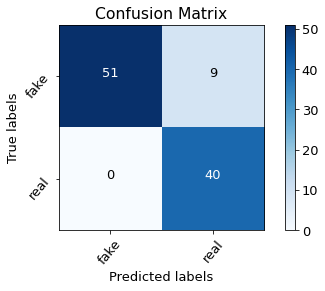

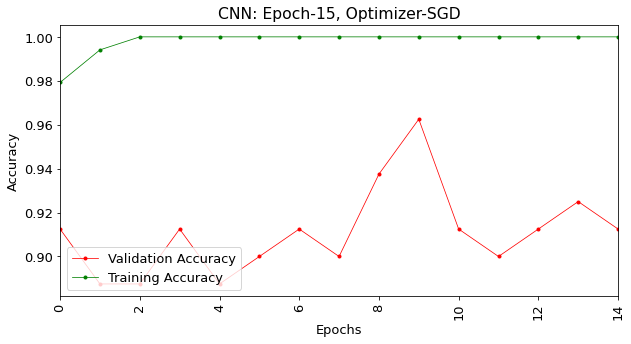

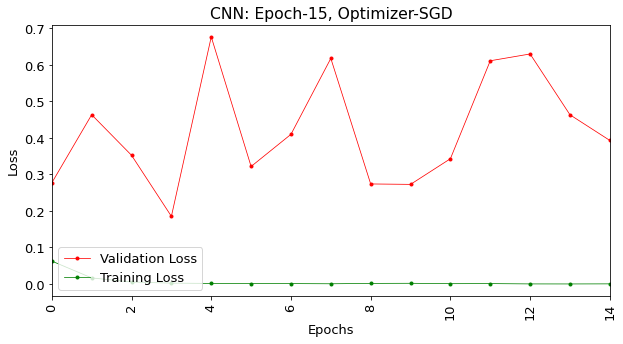

In [50]:
compile_model('SGD','sparse_categorical_crossentropy')
history = fit_model_new(15,training_data,validation_data,testing_data,34,20)

#confusion matrix and prediction
prediction= model.predict(x=testing_data,verbose=2)
np.round(prediction)   
cm = confusion_matrix(y_true = testing_data.classes, y_pred = np.argmax(prediction,axis = -1))
cm_plot_labels = ['fake','real']
confusion_matrix_plot(cm = cm, classes = cm_plot_labels, title= 'Confusion Matrix')
print('classification_report:\n',classification_report(testing_data.classes,np.argmax(prediction,axis = -1)))

plot_graph('Accuracy','CNN',15,'SGD',history.history['val_accuracy'],history.history['accuracy'],'Validation Accuracy','Training Accuracy',0.00,0.000)
plot_graph('Loss',    'CNN',15,'SGD',history.history['val_loss'],history.history['loss'],'Validation Loss','Training Loss',0.00,0.00)


Epoch 1/25
34/34 - 7s - loss: 1.0099e-04 - accuracy: 1.0000 - val_loss: 0.6808 - val_accuracy: 0.8875
Epoch 2/25
34/34 - 7s - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.5104 - val_accuracy: 0.9250
Epoch 3/25
34/34 - 7s - loss: 2.9559e-04 - accuracy: 1.0000 - val_loss: 0.4826 - val_accuracy: 0.9250
Epoch 4/25
34/34 - 7s - loss: 1.9039e-04 - accuracy: 1.0000 - val_loss: 0.7349 - val_accuracy: 0.9000
Epoch 5/25
34/34 - 7s - loss: 0.0566 - accuracy: 0.9852 - val_loss: 0.2876 - val_accuracy: 0.8625
Epoch 6/25
34/34 - 8s - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.2884 - val_accuracy: 0.8625
Epoch 7/25
34/34 - 7s - loss: 8.8880e-04 - accuracy: 1.0000 - val_loss: 0.3194 - val_accuracy: 0.8750
Epoch 8/25
34/34 - 7s - loss: 0.0036 - accuracy: 0.9970 - val_loss: 0.2622 - val_accuracy: 0.8625
Epoch 9/25
34/34 - 7s - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.2226 - val_accuracy: 0.8875
Epoch 10/25
34/34 - 7s - loss: 6.0394e-04 - accuracy: 1.0000 - val_loss: 0.2550 - val_accuracy: 0.8875

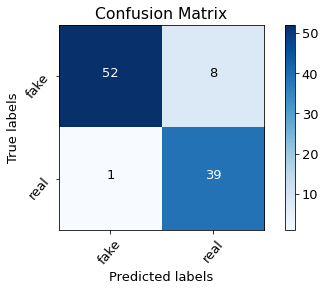

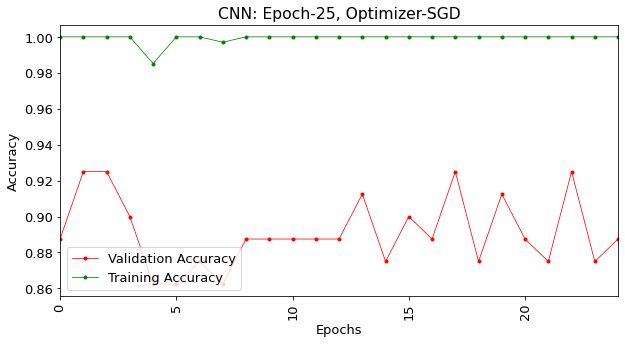

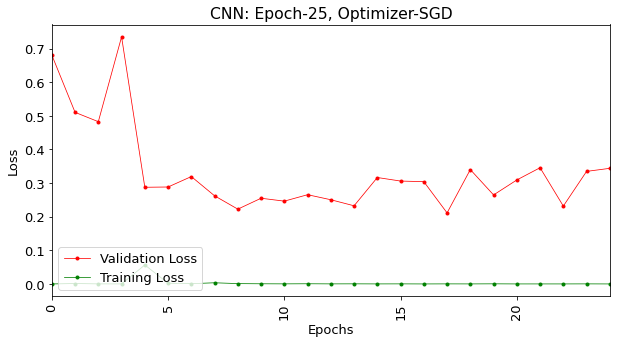

In [51]:
compile_model('SGD','sparse_categorical_crossentropy')
history = fit_model_new(25,training_data,validation_data,testing_data,34,20)

#confusion matrix and prediction
prediction= model.predict(x=testing_data,verbose=2)
np.round(prediction)   
cm = confusion_matrix(y_true = testing_data.classes, y_pred = np.argmax(prediction,axis = -1))
cm_plot_labels = ['fake','real']
confusion_matrix_plot(cm = cm, classes = cm_plot_labels, title= 'Confusion Matrix')
print('classification_report:\n',classification_report(testing_data.classes,np.argmax(prediction,axis = -1)))

plot_graph('Accuracy','CNN',25,'SGD',history.history['val_accuracy'],history.history['accuracy'],'Validation Accuracy','Training Accuracy',0.00,0.000)
plot_graph('Loss',    'CNN',25,'SGD',history.history['val_loss'],history.history['loss'],'Validation Loss','Training Loss',0.00,0.00)


Epoch 1/15
34/34 - 7s - loss: 0.0591 - accuracy: 0.9911 - val_loss: 0.9478 - val_accuracy: 0.8875
Epoch 2/15
34/34 - 7s - loss: 0.0415 - accuracy: 0.9852 - val_loss: 2.6383 - val_accuracy: 0.7875
Epoch 3/15
34/34 - 7s - loss: 0.0613 - accuracy: 0.9881 - val_loss: 0.5121 - val_accuracy: 0.9125
Epoch 4/15
34/34 - 7s - loss: 0.0189 - accuracy: 0.9941 - val_loss: 1.3188 - val_accuracy: 0.8750
Epoch 5/15
34/34 - 7s - loss: 0.0520 - accuracy: 0.9970 - val_loss: 0.4925 - val_accuracy: 0.9250
Epoch 6/15
34/34 - 7s - loss: 1.5435e-04 - accuracy: 1.0000 - val_loss: 1.1326 - val_accuracy: 0.8625
Epoch 7/15
34/34 - 8s - loss: 0.0196 - accuracy: 0.9970 - val_loss: 0.7817 - val_accuracy: 0.9250
Epoch 8/15
34/34 - 7s - loss: 0.0518 - accuracy: 0.9881 - val_loss: 0.8683 - val_accuracy: 0.8750
Epoch 9/15
34/34 - 7s - loss: 8.9880e-05 - accuracy: 1.0000 - val_loss: 0.7834 - val_accuracy: 0.9125
Epoch 10/15
34/34 - 7s - loss: 0.0662 - accuracy: 0.9881 - val_loss: 0.2876 - val_accuracy: 0.9375
Epoch 11/15

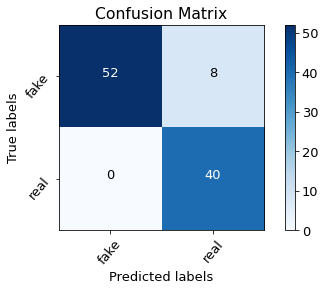

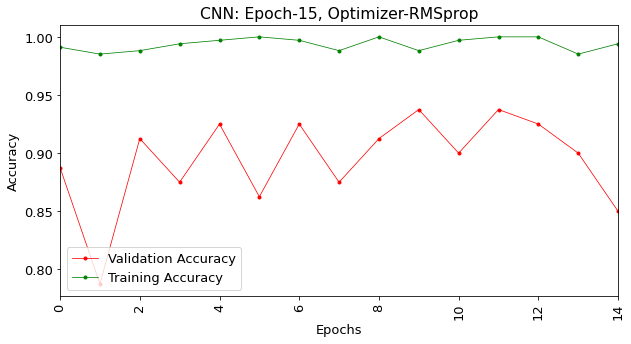

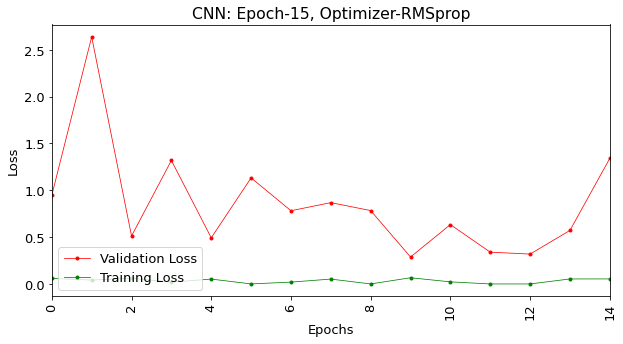

In [52]:
compile_model('RMSprop','sparse_categorical_crossentropy')
history = fit_model_new(15,training_data,validation_data,testing_data,34,20)

#confusion matrix and prediction
prediction= model.predict(x=testing_data,verbose=2)
np.round(prediction)   
cm = confusion_matrix(y_true = testing_data.classes, y_pred = np.argmax(prediction,axis = -1))
cm_plot_labels = ['fake','real']
confusion_matrix_plot(cm = cm, classes = cm_plot_labels, title= 'Confusion Matrix')
print('classification_report:\n',classification_report(testing_data.classes,np.argmax(prediction,axis = -1)))

plot_graph('Accuracy','CNN',15,'RMSprop',history.history['val_accuracy'],history.history['accuracy'],'Validation Accuracy','Training Accuracy',0.00,0.000)
plot_graph('Loss',    'CNN',15,'RMSprop',history.history['val_loss'],history.history['loss'],'Validation Loss','Training Loss',0.00,0.00)


Epoch 1/25
34/34 - 7s - loss: 0.0181 - accuracy: 0.9941 - val_loss: 2.1404 - val_accuracy: 0.8875
Epoch 2/25
34/34 - 7s - loss: 0.0037 - accuracy: 0.9970 - val_loss: 2.1887 - val_accuracy: 0.9000
Epoch 3/25
34/34 - 7s - loss: 6.5365e-05 - accuracy: 1.0000 - val_loss: 1.9735 - val_accuracy: 0.8875
Epoch 4/25
34/34 - 8s - loss: 0.2066 - accuracy: 0.9911 - val_loss: 1.7270 - val_accuracy: 0.8750
Epoch 5/25
34/34 - 7s - loss: 1.8558e-04 - accuracy: 1.0000 - val_loss: 1.7702 - val_accuracy: 0.8375
Epoch 6/25
34/34 - 7s - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.7154 - val_accuracy: 0.9000
Epoch 7/25
34/34 - 7s - loss: 1.0642e-05 - accuracy: 1.0000 - val_loss: 0.8509 - val_accuracy: 0.9250
Epoch 8/25
34/34 - 7s - loss: 8.0859e-07 - accuracy: 1.0000 - val_loss: 0.9040 - val_accuracy: 0.8875
Epoch 9/25
34/34 - 7s - loss: 1.9526e-07 - accuracy: 1.0000 - val_loss: 0.5866 - val_accuracy: 0.9250
Epoch 10/25
34/34 - 7s - loss: 3.0421e-08 - accuracy: 1.0000 - val_loss: 0.3031 - val_accuracy: 0.

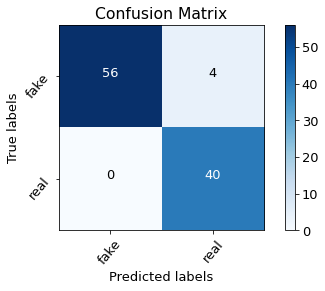

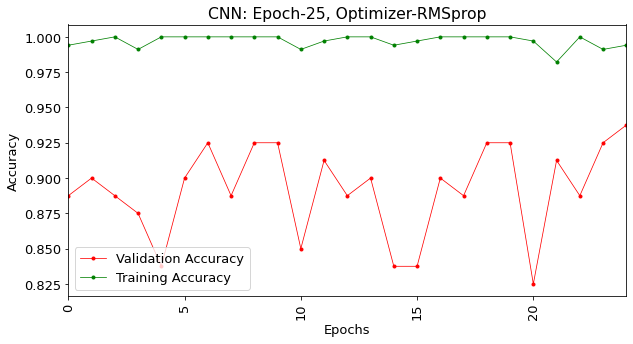

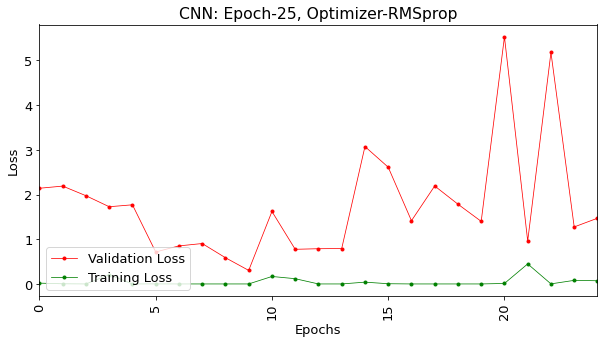

In [53]:
compile_model('RMSprop','sparse_categorical_crossentropy')
history = fit_model_new(25,training_data,validation_data,testing_data,34,20)

#confusion matrix and prediction
prediction= model.predict(x=testing_data,verbose=2)
np.round(prediction)   
cm = confusion_matrix(y_true = testing_data.classes, y_pred = np.argmax(prediction,axis = -1))
cm_plot_labels = ['fake','real']
confusion_matrix_plot(cm = cm, classes = cm_plot_labels, title= 'Confusion Matrix')
print('classification_report:\n',classification_report(testing_data.classes,np.argmax(prediction,axis = -1)))

plot_graph('Accuracy','CNN',25,'RMSprop',history.history['val_accuracy'],history.history['accuracy'],'Validation Accuracy','Training Accuracy',0.00,0.000)
plot_graph('Loss',    'CNN',25,'RMSprop',history.history['val_loss'],history.history['loss'],'Validation Loss','Training Loss',0.00,0.00)


### CNN(discarded)

In [54]:
model = Sequential()
model.add(Conv2D(16, kernel_size=(3,3), activation='relu',padding='same', input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=(4,4), strides=4))
model.add(Dropout(0.50))

model.add(Conv2D(32, kernel_size=(3,3), activation='relu',padding='same'))
model.add(Conv2D(32, kernel_size=(3,3), activation='relu',padding='same'))

model.add(MaxPooling2D(pool_size=(4,4), strides=4))

model.add(Conv2D(64, kernel_size=(3,3), activation='relu',padding='same'))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(4,4), strides=4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu',padding='same'))
model.add(Conv2D(256, kernel_size=(3,3), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2))

model.add(Flatten())
model.add(Dense(2, activation='softmax'))

print(model.summary())

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_131 (Conv2D)          (None, 224, 224, 16)      448       
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 56, 56, 16)        0         
_________________________________________________________________
dropout_17 (Dropout)         (None, 56, 56, 16)        0         
_________________________________________________________________
conv2d_132 (Conv2D)          (None, 56, 56, 32)        4640      
_________________________________________________________________
conv2d_133 (Conv2D)          (None, 56, 56, 32)        9248      
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_134 (Conv2D)          (None, 14, 14, 64)       

Epoch 1/15
34/34 - 7s - loss: 7.3936 - accuracy: 0.4748 - val_loss: 0.6762 - val_accuracy: 0.5625
Epoch 2/15
34/34 - 7s - loss: 0.6920 - accuracy: 0.5816 - val_loss: 0.6856 - val_accuracy: 0.5375
Epoch 3/15
34/34 - 7s - loss: 0.6826 - accuracy: 0.6024 - val_loss: 0.6283 - val_accuracy: 0.6625
Epoch 4/15
34/34 - 7s - loss: 0.6714 - accuracy: 0.5816 - val_loss: 0.6873 - val_accuracy: 0.5750
Epoch 5/15
34/34 - 7s - loss: 0.6877 - accuracy: 0.5816 - val_loss: 0.6876 - val_accuracy: 0.5125
Epoch 6/15
34/34 - 7s - loss: 0.6930 - accuracy: 0.5964 - val_loss: 0.6827 - val_accuracy: 0.5500
Epoch 7/15
34/34 - 7s - loss: 0.6893 - accuracy: 0.5816 - val_loss: 0.6769 - val_accuracy: 0.5250
Epoch 8/15
34/34 - 7s - loss: 0.6528 - accuracy: 0.6142 - val_loss: 0.6737 - val_accuracy: 0.5750
Epoch 9/15
34/34 - 7s - loss: 0.6283 - accuracy: 0.6588 - val_loss: 0.6795 - val_accuracy: 0.5375
Epoch 10/15
34/34 - 7s - loss: 0.7055 - accuracy: 0.5401 - val_loss: 0.6913 - val_accuracy: 0.5500
Epoch 11/15
34/34 -

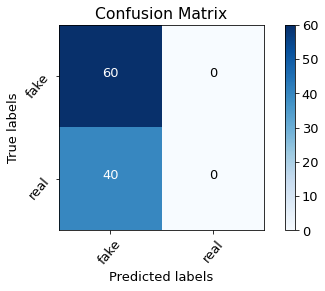

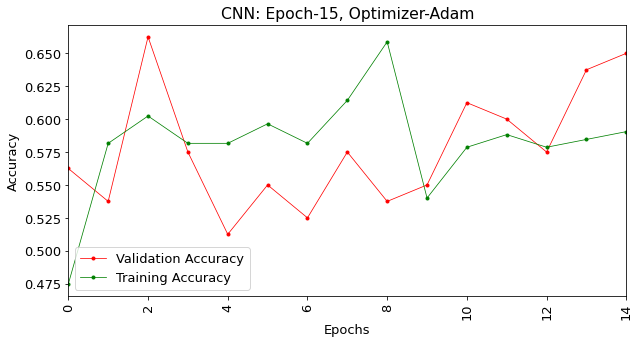

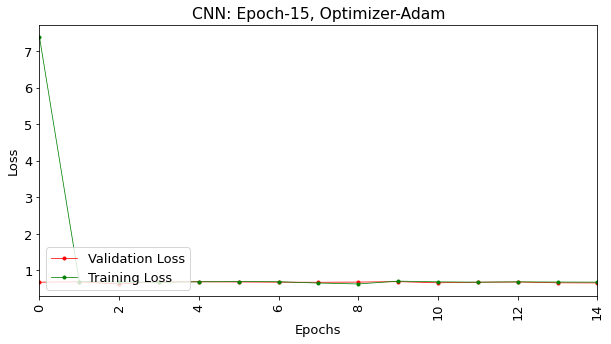

In [55]:
compile_model('Adam','sparse_categorical_crossentropy')
history = fit_model_new(15,training_data,validation_data,testing_data,34,20)

#confusion matrix and prediction
prediction= model.predict(x=testing_data,verbose=2)
np.round(prediction)   
cm = confusion_matrix(y_true = testing_data.classes, y_pred = np.argmax(prediction,axis = -1))
cm_plot_labels = ['fake','real']
confusion_matrix_plot(cm = cm, classes = cm_plot_labels, title= 'Confusion Matrix')
print('classification_report:\n',classification_report(testing_data.classes,np.argmax(prediction,axis = -1)))

plot_graph('Accuracy','CNN',15,'Adam',history.history['val_accuracy'],history.history['accuracy'],'Validation Accuracy','Training Accuracy',0.00,0.000)
plot_graph('Loss',    'CNN',15,'Adam',history.history['val_loss'],history.history['loss'],'Validation Loss','Training Loss',0.00,0.00)


Epoch 1/25
34/34 - 7s - loss: 0.6813 - accuracy: 0.5816 - val_loss: 0.6743 - val_accuracy: 0.6000
Epoch 2/25
34/34 - 7s - loss: 0.6785 - accuracy: 0.5912 - val_loss: 0.6694 - val_accuracy: 0.6125
Epoch 3/25
34/34 - 7s - loss: 0.6802 - accuracy: 0.5846 - val_loss: 0.6740 - val_accuracy: 0.6000
Epoch 4/25
34/34 - 7s - loss: 0.6818 - accuracy: 0.5816 - val_loss: 0.6683 - val_accuracy: 0.6250
Epoch 5/25
34/34 - 7s - loss: 0.6771 - accuracy: 0.5964 - val_loss: 0.6783 - val_accuracy: 0.5875
Epoch 6/25
34/34 - 7s - loss: 0.6854 - accuracy: 0.5816 - val_loss: 0.6741 - val_accuracy: 0.6000
Epoch 7/25
34/34 - 7s - loss: 0.6815 - accuracy: 0.5846 - val_loss: 0.6977 - val_accuracy: 0.5125
Epoch 8/25
34/34 - 7s - loss: 0.6815 - accuracy: 0.5846 - val_loss: 0.6819 - val_accuracy: 0.5750
Epoch 9/25
34/34 - 7s - loss: 0.6781 - accuracy: 0.5935 - val_loss: 0.6645 - val_accuracy: 0.6250
Epoch 10/25
34/34 - 7s - loss: 0.6809 - accuracy: 0.5846 - val_loss: 0.6858 - val_accuracy: 0.5625
Epoch 11/25
34/34 -

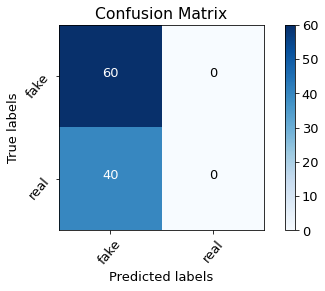

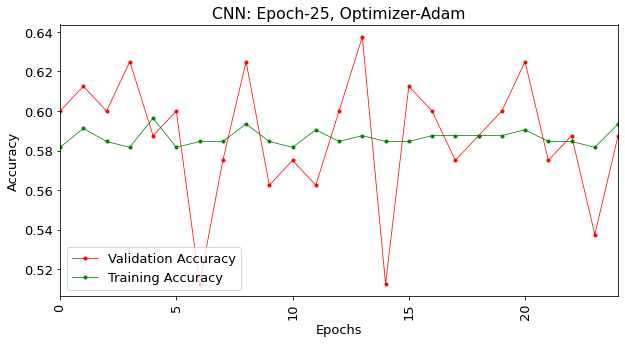

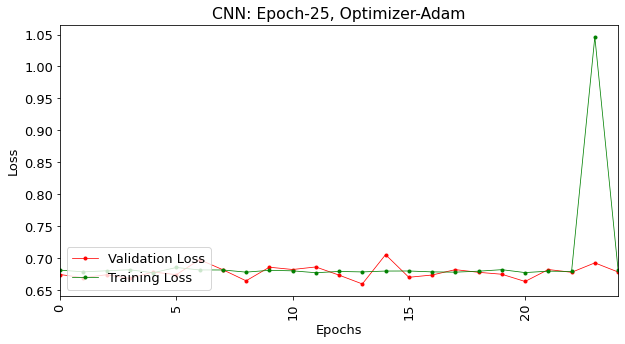

In [56]:
compile_model('Adam','sparse_categorical_crossentropy')
history = fit_model_new(25,training_data,validation_data,testing_data,34,20)

#confusion matrix and prediction
prediction= model.predict(x=testing_data,verbose=2)
np.round(prediction)   
cm = confusion_matrix(y_true = testing_data.classes, y_pred = np.argmax(prediction,axis = -1))
cm_plot_labels = ['fake','real']
confusion_matrix_plot(cm = cm, classes = cm_plot_labels, title= 'Confusion Matrix')
print('classification_report:\n',classification_report(testing_data.classes,np.argmax(prediction,axis = -1)))

plot_graph('Accuracy','CNN',25,'Adam',history.history['val_accuracy'],history.history['accuracy'],'Validation Accuracy','Training Accuracy',0.00,0.000)
plot_graph('Loss',    'CNN',25,'Adam',history.history['val_loss'],history.history['loss'],'Validation Loss','Training Loss',0.00,0.00)


Epoch 1/15
34/34 - 7s - loss: 0.6769 - accuracy: 0.5786 - val_loss: 0.6336 - val_accuracy: 0.6125
Epoch 2/15
34/34 - 7s - loss: 0.6396 - accuracy: 0.5905 - val_loss: 0.6492 - val_accuracy: 0.6875
Epoch 3/15
34/34 - 7s - loss: 0.6246 - accuracy: 0.6588 - val_loss: 0.6015 - val_accuracy: 0.6625
Epoch 4/15
34/34 - 7s - loss: 0.5890 - accuracy: 0.7062 - val_loss: 0.5842 - val_accuracy: 0.7125
Epoch 5/15
34/34 - 7s - loss: 0.5424 - accuracy: 0.7418 - val_loss: 0.5420 - val_accuracy: 0.7125
Epoch 6/15
34/34 - 7s - loss: 0.5004 - accuracy: 0.7596 - val_loss: 0.5127 - val_accuracy: 0.7750
Epoch 7/15
34/34 - 7s - loss: 0.4733 - accuracy: 0.7685 - val_loss: 0.4614 - val_accuracy: 0.7500
Epoch 8/15
34/34 - 7s - loss: 0.4639 - accuracy: 0.7982 - val_loss: 0.4254 - val_accuracy: 0.8750
Epoch 9/15
34/34 - 7s - loss: 0.4099 - accuracy: 0.8235 - val_loss: 0.3629 - val_accuracy: 0.8375
Epoch 10/15
34/34 - 7s - loss: 0.3639 - accuracy: 0.8441 - val_loss: 0.5144 - val_accuracy: 0.6875
Epoch 11/15
34/34 -

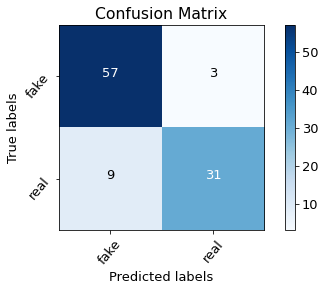

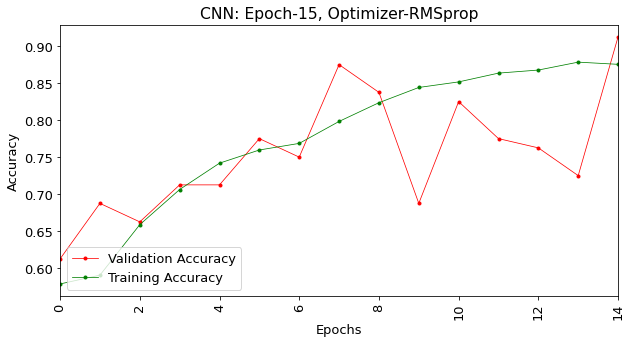

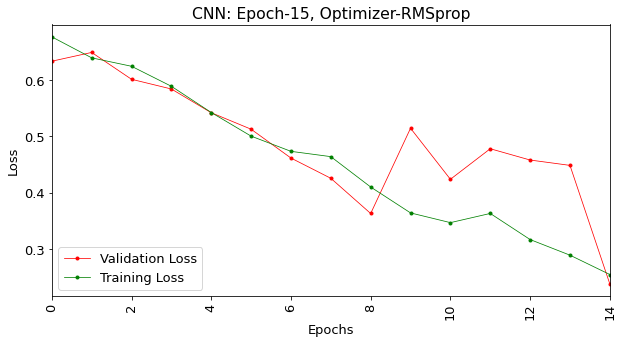

In [57]:
compile_model('RMSprop','sparse_categorical_crossentropy')
history = fit_model_new(15,training_data,validation_data,testing_data,34,20)

#confusion matrix and prediction
prediction= model.predict(x=testing_data,verbose=2)
np.round(prediction)   
cm = confusion_matrix(y_true = testing_data.classes, y_pred = np.argmax(prediction,axis = -1))
cm_plot_labels = ['fake','real']
confusion_matrix_plot(cm = cm, classes = cm_plot_labels, title= 'Confusion Matrix')
print('classification_report:\n',classification_report(testing_data.classes,np.argmax(prediction,axis = -1)))

plot_graph('Accuracy','CNN',15,'RMSprop',history.history['val_accuracy'],history.history['accuracy'],'Validation Accuracy','Training Accuracy',0.00,0.000)
plot_graph('Loss',    'CNN',15,'RMSprop',history.history['val_loss'],history.history['loss'],'Validation Loss','Training Loss',0.00,0.00)


Epoch 1/25
34/34 - 8s - loss: 0.3082 - accuracy: 0.8605 - val_loss: 0.2243 - val_accuracy: 0.9250
Epoch 2/25
34/34 - 7s - loss: 0.2491 - accuracy: 0.9050 - val_loss: 0.3410 - val_accuracy: 0.8375
Epoch 3/25
34/34 - 7s - loss: 0.2204 - accuracy: 0.9139 - val_loss: 0.3908 - val_accuracy: 0.8500
Epoch 4/25
34/34 - 7s - loss: 0.1773 - accuracy: 0.9377 - val_loss: 0.3448 - val_accuracy: 0.8375
Epoch 5/25
34/34 - 7s - loss: 0.1788 - accuracy: 0.9199 - val_loss: 0.2257 - val_accuracy: 0.9000
Epoch 6/25
34/34 - 7s - loss: 0.1755 - accuracy: 0.9407 - val_loss: 0.2972 - val_accuracy: 0.8500
Epoch 7/25
34/34 - 7s - loss: 0.1333 - accuracy: 0.9496 - val_loss: 0.2371 - val_accuracy: 0.9000
Epoch 8/25
34/34 - 7s - loss: 0.1445 - accuracy: 0.9466 - val_loss: 0.2406 - val_accuracy: 0.9125
Epoch 9/25
34/34 - 7s - loss: 0.1044 - accuracy: 0.9674 - val_loss: 0.1779 - val_accuracy: 0.9125
Epoch 10/25
34/34 - 7s - loss: 0.1474 - accuracy: 0.9496 - val_loss: 0.1928 - val_accuracy: 0.9250
Epoch 11/25
34/34 -

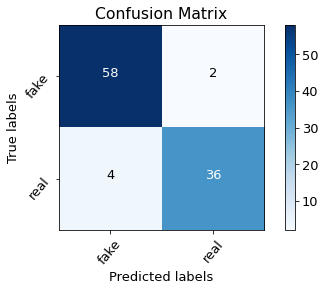

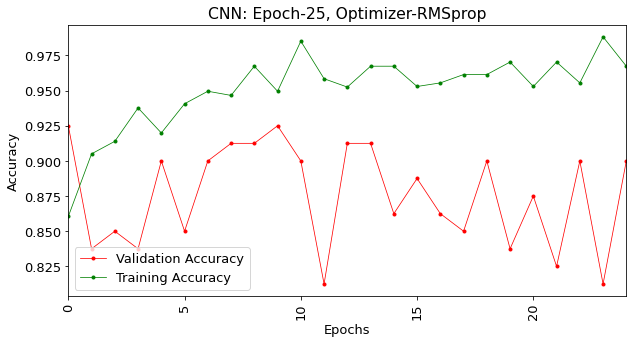

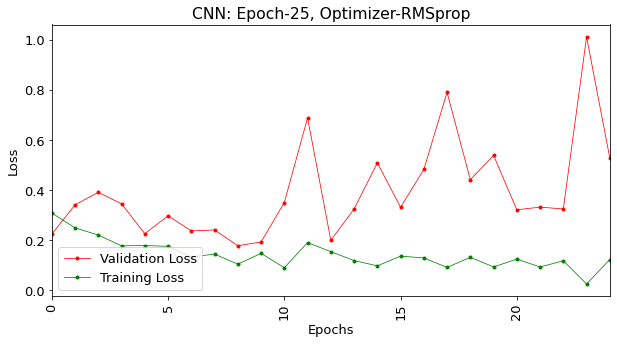

In [58]:
compile_model('RMSprop','sparse_categorical_crossentropy')
history = fit_model_new(25,training_data,validation_data,testing_data,34,20)

#confusion matrix and prediction
prediction= model.predict(x=testing_data,verbose=2)
np.round(prediction)   
cm = confusion_matrix(y_true = testing_data.classes, y_pred = np.argmax(prediction,axis = -1))
cm_plot_labels = ['fake','real']
confusion_matrix_plot(cm = cm, classes = cm_plot_labels, title= 'Confusion Matrix')
print('classification_report:\n',classification_report(testing_data.classes,np.argmax(prediction,axis = -1)))

plot_graph('Accuracy','CNN',25,'RMSprop',history.history['val_accuracy'],history.history['accuracy'],'Validation Accuracy','Training Accuracy',0.00,0.000)
plot_graph('Loss',    'CNN',25,'RMSprop',history.history['val_loss'],history.history['loss'],'Validation Loss','Training Loss',0.00,0.00)


Epoch 1/15
34/34 - 8s - loss: 1.5029 - accuracy: 0.8932 - val_loss: 0.6950 - val_accuracy: 0.5500
Epoch 2/15
34/34 - 7s - loss: 0.6805 - accuracy: 0.5846 - val_loss: 0.6712 - val_accuracy: 0.6375
Epoch 3/15
34/34 - 8s - loss: 0.6509 - accuracy: 0.5905 - val_loss: 0.6605 - val_accuracy: 0.6250
Epoch 4/15
34/34 - 7s - loss: 0.6332 - accuracy: 0.5875 - val_loss: 0.6808 - val_accuracy: 0.6000
Epoch 5/15
34/34 - 7s - loss: 0.6351 - accuracy: 0.5994 - val_loss: 0.6797 - val_accuracy: 0.5750
Epoch 6/15
34/34 - 7s - loss: 0.6369 - accuracy: 0.6172 - val_loss: 0.6664 - val_accuracy: 0.6000
Epoch 7/15
34/34 - 7s - loss: 0.6386 - accuracy: 0.6113 - val_loss: 0.6776 - val_accuracy: 0.5500
Epoch 8/15
34/34 - 7s - loss: 0.6190 - accuracy: 0.6380 - val_loss: 0.6729 - val_accuracy: 0.5750
Epoch 9/15
34/34 - 7s - loss: 0.6008 - accuracy: 0.6884 - val_loss: 0.6726 - val_accuracy: 0.6000
Epoch 10/15
34/34 - 7s - loss: 0.5806 - accuracy: 0.7003 - val_loss: 0.6745 - val_accuracy: 0.5375
Epoch 11/15
34/34 -

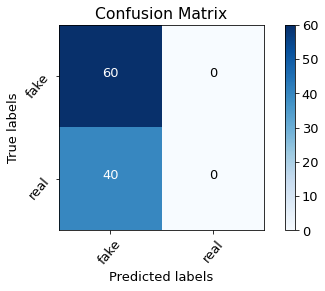

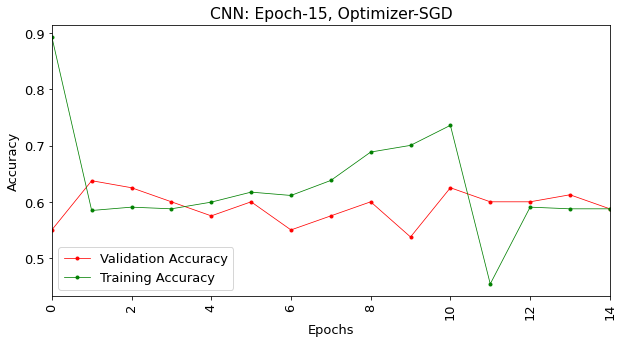

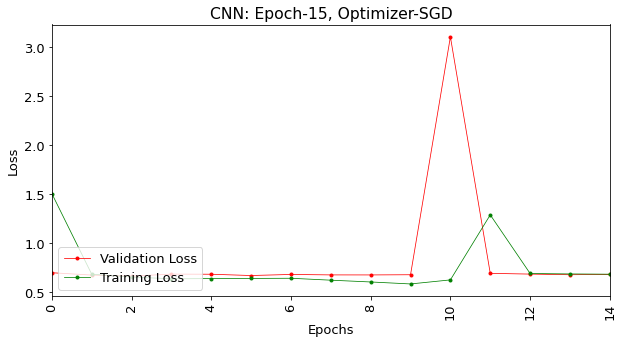

In [59]:
compile_model('SGD','sparse_categorical_crossentropy')
history = fit_model_new(15,training_data,validation_data,testing_data,34,20)

#confusion matrix and prediction
prediction= model.predict(x=testing_data,verbose=2)
np.round(prediction)   
cm = confusion_matrix(y_true = testing_data.classes, y_pred = np.argmax(prediction,axis = -1))
cm_plot_labels = ['fake','real']
confusion_matrix_plot(cm = cm, classes = cm_plot_labels, title= 'Confusion Matrix')
print('classification_report:\n',classification_report(testing_data.classes,np.argmax(prediction,axis = -1)))

plot_graph('Accuracy','CNN',15,'SGD',history.history['val_accuracy'],history.history['accuracy'],'Validation Accuracy','Training Accuracy',0.00,0.000)
plot_graph('Loss',    'CNN',15,'SGD',history.history['val_loss'],history.history['loss'],'Validation Loss','Training Loss',0.00,0.00)


Epoch 1/25
34/34 - 7s - loss: 0.6784 - accuracy: 0.5905 - val_loss: 0.6743 - val_accuracy: 0.6000
Epoch 2/25
34/34 - 7s - loss: 0.6759 - accuracy: 0.5964 - val_loss: 0.6643 - val_accuracy: 0.6250
Epoch 3/25
34/34 - 7s - loss: 0.6794 - accuracy: 0.5846 - val_loss: 0.6722 - val_accuracy: 0.6000
Epoch 4/25
34/34 - 8s - loss: 0.6772 - accuracy: 0.5905 - val_loss: 0.6676 - val_accuracy: 0.6125
Epoch 5/25
34/34 - 7s - loss: 0.6784 - accuracy: 0.5875 - val_loss: 0.6860 - val_accuracy: 0.5625
Epoch 6/25
34/34 - 7s - loss: 0.6795 - accuracy: 0.5846 - val_loss: 0.6766 - val_accuracy: 0.5875
Epoch 7/25
34/34 - 7s - loss: 0.6793 - accuracy: 0.5846 - val_loss: 0.6685 - val_accuracy: 0.6125
Epoch 8/25
34/34 - 7s - loss: 0.6784 - accuracy: 0.5875 - val_loss: 0.6767 - val_accuracy: 0.5875
Epoch 9/25
34/34 - 7s - loss: 0.6802 - accuracy: 0.5816 - val_loss: 0.6770 - val_accuracy: 0.5875
Epoch 10/25
34/34 - 7s - loss: 0.6760 - accuracy: 0.5941 - val_loss: 0.6764 - val_accuracy: 0.5875
Epoch 11/25
34/34 -

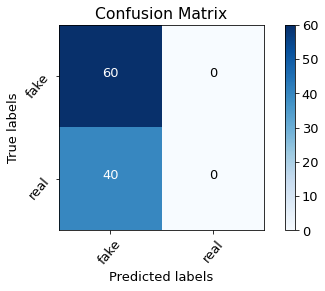

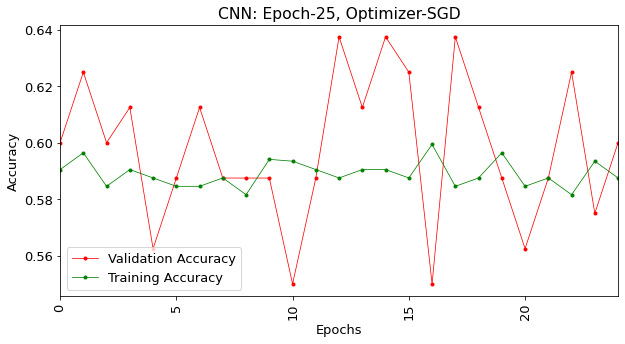

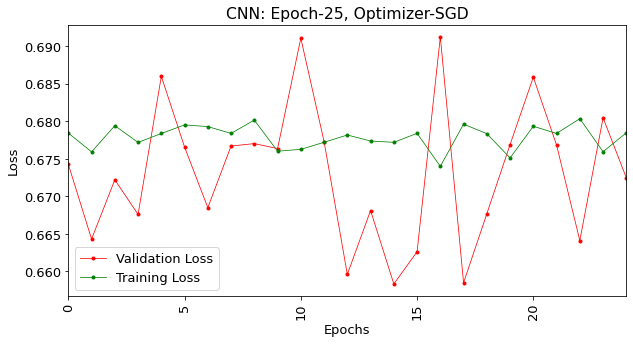

In [60]:
compile_model('SGD','sparse_categorical_crossentropy')
history = fit_model_new(25,training_data,validation_data,testing_data,34,20)

#confusion matrix and prediction
prediction= model.predict(x=testing_data,verbose=2)
np.round(prediction)   
cm = confusion_matrix(y_true = testing_data.classes, y_pred = np.argmax(prediction,axis = -1))
cm_plot_labels = ['fake','real']
confusion_matrix_plot(cm = cm, classes = cm_plot_labels, title= 'Confusion Matrix')
print('classification_report:\n',classification_report(testing_data.classes,np.argmax(prediction,axis = -1)))

plot_graph('Accuracy','CNN',25,'SGD',history.history['val_accuracy'],history.history['accuracy'],'Validation Accuracy','Training Accuracy',0.00,0.000)
plot_graph('Loss',    'CNN',25,'SGD',history.history['val_loss'],history.history['loss'],'Validation Loss','Training Loss',0.00,0.00)


### ResNet50

In [61]:
model = Sequential()
model.add(ResNet50(include_top=False, weights='imagenet', pooling = 'avg'))
model.add(Dense(2, activation="softmax"))
model.layers[0].trainable = False
model.summary()

94773248/94765736 [==============================] - 1s 0us/step
Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
dense_9 (Dense)              (None, 2)                 4098      
Total params: 23,591,810
Trainable params: 4,098
Non-trainable params: 23,587,712
_________________________________________________________________


Epoch 1/5
34/34 - 8s - loss: 0.7075 - accuracy: 0.5994 - val_loss: 0.5350 - val_accuracy: 0.7375
Epoch 2/5
34/34 - 8s - loss: 0.5772 - accuracy: 0.6973 - val_loss: 0.5342 - val_accuracy: 0.6750
Epoch 3/5
34/34 - 8s - loss: 0.4637 - accuracy: 0.8071 - val_loss: 0.4410 - val_accuracy: 0.8500
Epoch 4/5
34/34 - 7s - loss: 0.4570 - accuracy: 0.7893 - val_loss: 0.4570 - val_accuracy: 0.8125
Epoch 5/5
34/34 - 7s - loss: 0.4108 - accuracy: 0.8309 - val_loss: 0.4416 - val_accuracy: 0.7875
25/25 - 2s
Confusion Matrix
[[54  6]
 [11 29]]
classification_report:
               precision    recall  f1-score   support

           0       0.83      0.90      0.86        60
           1       0.83      0.72      0.77        40

    accuracy                           0.83       100
   macro avg       0.83      0.81      0.82       100
weighted avg       0.83      0.83      0.83       100



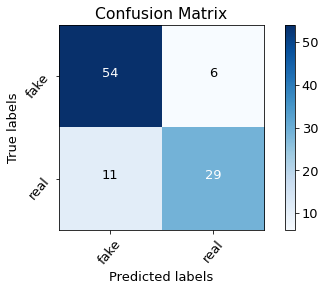

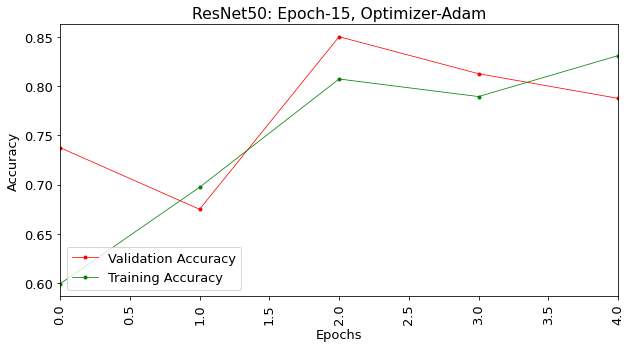

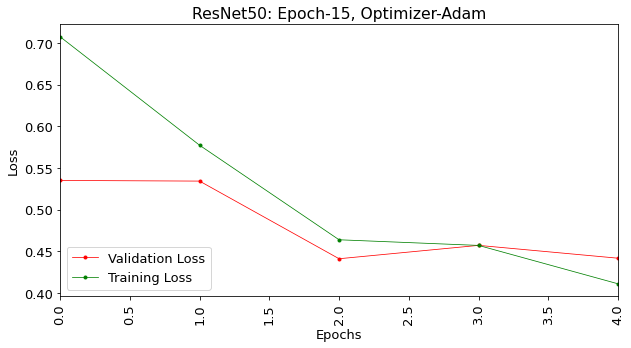

In [62]:
compile_model('Adam','sparse_categorical_crossentropy')
history = fit_model_new(5,training_data,validation_data,testing_data,34,20)

#confusion matrix and prediction
prediction= model.predict(x=testing_data,verbose=2)
np.round(prediction)   
cm = confusion_matrix(y_true = testing_data.classes, y_pred = np.argmax(prediction,axis = -1))
cm_plot_labels = ['fake','real']
confusion_matrix_plot(cm = cm, classes = cm_plot_labels, title= 'Confusion Matrix')
print('classification_report:\n',classification_report(testing_data.classes,np.argmax(prediction,axis = -1)))

plot_graph('Accuracy','ResNet50',15,'Adam',history.history['val_accuracy'],history.history['accuracy'],'Validation Accuracy','Training Accuracy',0.00,0.000)
plot_graph('Loss',    'ResNet50',15,'Adam',history.history['val_loss'],history.history['loss'],'Validation Loss','Training Loss',0.00,0.00)


Epoch 1/15
34/34 - 9s - loss: 0.4101 - accuracy: 0.7923 - val_loss: 0.4002 - val_accuracy: 0.8875
Epoch 2/15
34/34 - 7s - loss: 0.3523 - accuracy: 0.8813 - val_loss: 0.3573 - val_accuracy: 0.8875
Epoch 3/15
34/34 - 7s - loss: 0.3122 - accuracy: 0.8872 - val_loss: 0.3847 - val_accuracy: 0.8500
Epoch 4/15
34/34 - 8s - loss: 0.2926 - accuracy: 0.8932 - val_loss: 0.3795 - val_accuracy: 0.8375
Epoch 5/15
34/34 - 7s - loss: 0.2648 - accuracy: 0.9169 - val_loss: 0.3308 - val_accuracy: 0.8750
Epoch 6/15
34/34 - 8s - loss: 0.2533 - accuracy: 0.9407 - val_loss: 0.3063 - val_accuracy: 0.8875
Epoch 7/15
34/34 - 7s - loss: 0.2544 - accuracy: 0.9021 - val_loss: 0.3301 - val_accuracy: 0.8750
Epoch 8/15
34/34 - 7s - loss: 0.2256 - accuracy: 0.9318 - val_loss: 0.3283 - val_accuracy: 0.8750
Epoch 9/15
34/34 - 7s - loss: 0.2101 - accuracy: 0.9377 - val_loss: 0.3419 - val_accuracy: 0.8375
Epoch 10/15
34/34 - 8s - loss: 0.1857 - accuracy: 0.9703 - val_loss: 0.2276 - val_accuracy: 0.9250
Epoch 11/15
34/34 -

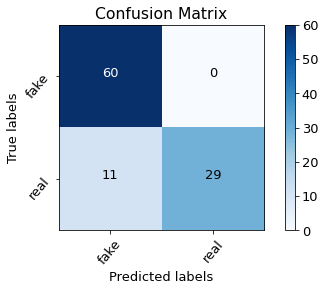

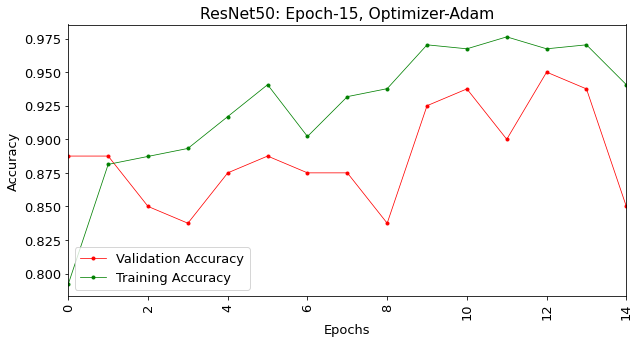

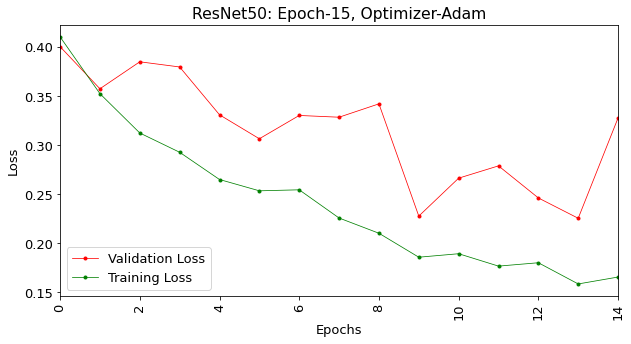

In [63]:
compile_model('Adam','sparse_categorical_crossentropy')
history = fit_model_new(15,training_data,validation_data,testing_data,34,20)

#confusion matrix and prediction
prediction= model.predict(x=testing_data,verbose=2)
np.round(prediction)   
cm = confusion_matrix(y_true = testing_data.classes, y_pred = np.argmax(prediction,axis = -1))
cm_plot_labels = ['fake','real']
confusion_matrix_plot(cm = cm, classes = cm_plot_labels, title= 'Confusion Matrix')
print('classification_report:\n',classification_report(testing_data.classes,np.argmax(prediction,axis = -1)))

plot_graph('Accuracy','ResNet50',15,'Adam',history.history['val_accuracy'],history.history['accuracy'],'Validation Accuracy','Training Accuracy',0.00,0.000)
plot_graph('Loss',    'ResNet50',15,'Adam',history.history['val_loss'],history.history['loss'],'Validation Loss','Training Loss',0.00,0.00)


Epoch 1/5
34/34 - 8s - loss: 1.8383 - accuracy: 0.6795 - val_loss: 2.1607 - val_accuracy: 0.6000
Epoch 2/5
34/34 - 8s - loss: 0.9041 - accuracy: 0.7893 - val_loss: 2.4974 - val_accuracy: 0.4375
Epoch 3/5
34/34 - 8s - loss: 0.8707 - accuracy: 0.7834 - val_loss: 0.3376 - val_accuracy: 0.8750
Epoch 4/5
34/34 - 8s - loss: 1.1281 - accuracy: 0.7804 - val_loss: 3.7147 - val_accuracy: 0.3625
Epoch 5/5
34/34 - 7s - loss: 1.0034 - accuracy: 0.7596 - val_loss: 0.3663 - val_accuracy: 0.8500
25/25 - 2s
Confusion Matrix
[[51  9]
 [ 7 33]]
classification_report:
               precision    recall  f1-score   support

           0       0.88      0.85      0.86        60
           1       0.79      0.82      0.80        40

    accuracy                           0.84       100
   macro avg       0.83      0.84      0.83       100
weighted avg       0.84      0.84      0.84       100



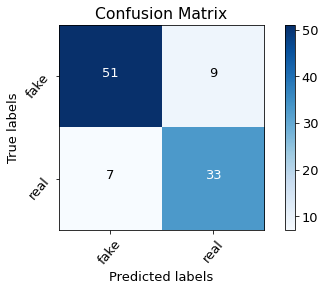

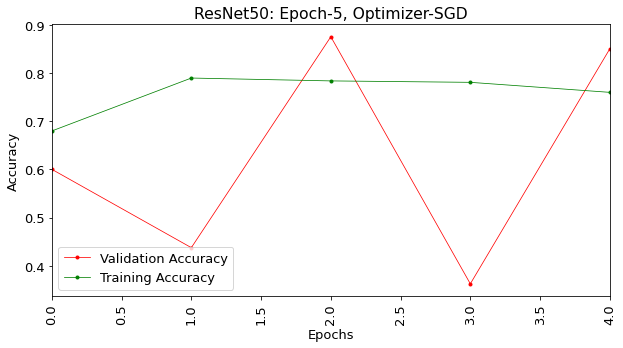

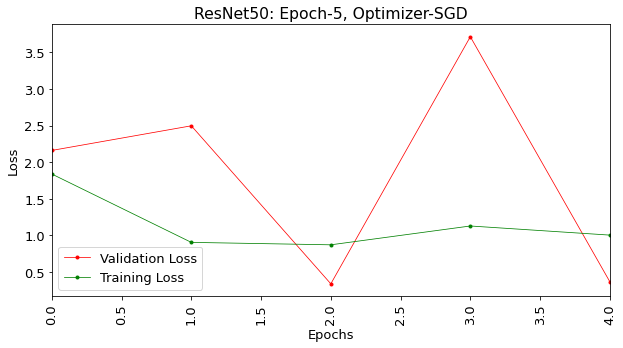

In [64]:
compile_model('SGD','sparse_categorical_crossentropy')
history = fit_model_new(5,training_data,validation_data,testing_data,34,20)

#confusion matrix and prediction
prediction= model.predict(x=testing_data,verbose=2)
np.round(prediction)   
cm = confusion_matrix(y_true = testing_data.classes, y_pred = np.argmax(prediction,axis = -1))
cm_plot_labels = ['fake','real']
confusion_matrix_plot(cm = cm, classes = cm_plot_labels, title= 'Confusion Matrix')
print('classification_report:\n',classification_report(testing_data.classes,np.argmax(prediction,axis = -1)))

plot_graph('Accuracy','ResNet50',5,'SGD',history.history['val_accuracy'],history.history['accuracy'],'Validation Accuracy','Training Accuracy',0.00,0.000)
plot_graph('Loss',    'ResNet50',5,'SGD',history.history['val_loss'],history.history['loss'],'Validation Loss','Training Loss',0.00,0.00)


Epoch 1/15
34/34 - 8s - loss: 0.7294 - accuracy: 0.7893 - val_loss: 2.4396 - val_accuracy: 0.6000
Epoch 2/15
34/34 - 7s - loss: 1.6591 - accuracy: 0.6261 - val_loss: 0.6138 - val_accuracy: 0.8125
Epoch 3/15
34/34 - 7s - loss: 0.3743 - accuracy: 0.8843 - val_loss: 0.7228 - val_accuracy: 0.7125
Epoch 4/15
34/34 - 8s - loss: 0.8814 - accuracy: 0.7418 - val_loss: 0.5816 - val_accuracy: 0.7750
Epoch 5/15
34/34 - 8s - loss: 0.8661 - accuracy: 0.8249 - val_loss: 0.3311 - val_accuracy: 0.8750
Epoch 6/15
34/34 - 8s - loss: 0.4026 - accuracy: 0.8546 - val_loss: 0.2818 - val_accuracy: 0.8875
Epoch 7/15
34/34 - 7s - loss: 0.5617 - accuracy: 0.8398 - val_loss: 0.6848 - val_accuracy: 0.7750
Epoch 8/15
34/34 - 8s - loss: 0.1951 - accuracy: 0.9347 - val_loss: 0.2706 - val_accuracy: 0.9000
Epoch 9/15
34/34 - 8s - loss: 0.3364 - accuracy: 0.8783 - val_loss: 0.6778 - val_accuracy: 0.7500
Epoch 10/15
34/34 - 7s - loss: 0.6173 - accuracy: 0.8101 - val_loss: 1.0881 - val_accuracy: 0.6875
Epoch 11/15
34/34 -

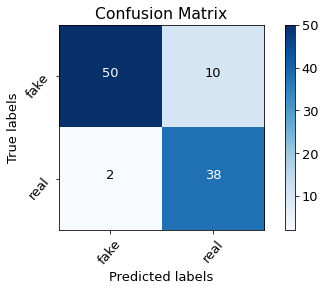

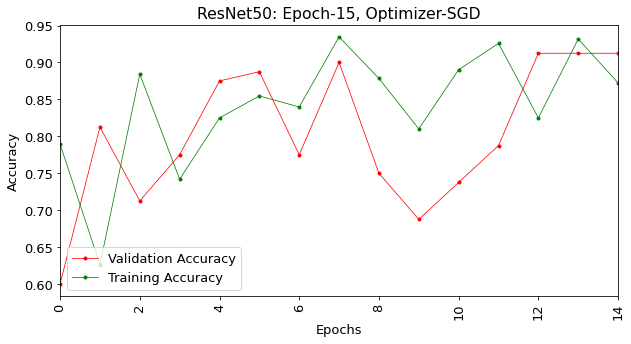

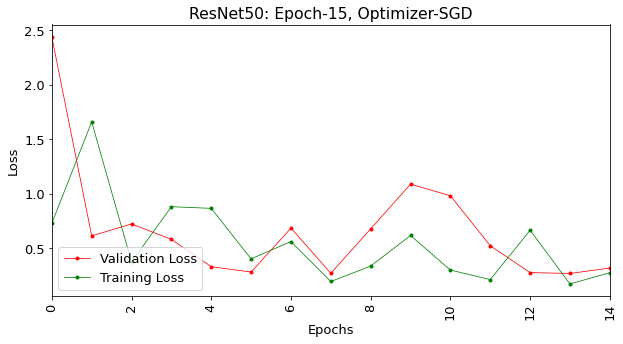

In [65]:
compile_model('SGD','sparse_categorical_crossentropy')
history = fit_model_new(15,training_data,validation_data,testing_data,34,20)

#confusion matrix and prediction
prediction= model.predict(x=testing_data,verbose=2)
np.round(prediction)   
cm = confusion_matrix(y_true = testing_data.classes, y_pred = np.argmax(prediction,axis = -1))
cm_plot_labels = ['fake','real']
confusion_matrix_plot(cm = cm, classes = cm_plot_labels, title= 'Confusion Matrix')
print('classification_report:\n',classification_report(testing_data.classes,np.argmax(prediction,axis = -1)))

plot_graph('Accuracy','ResNet50',15,'SGD',history.history['val_accuracy'],history.history['accuracy'],'Validation Accuracy','Training Accuracy',0.00,0.000)
plot_graph('Loss',    'ResNet50',15,'SGD',history.history['val_loss'],history.history['loss'],'Validation Loss','Training Loss',0.00,0.00)


Epoch 1/5
34/34 - 9s - loss: 0.1365 - accuracy: 0.9496 - val_loss: 0.1190 - val_accuracy: 0.9500
Epoch 2/5
34/34 - 7s - loss: 0.1151 - accuracy: 0.9644 - val_loss: 0.2251 - val_accuracy: 0.9250
Epoch 3/5
34/34 - 7s - loss: 0.1027 - accuracy: 0.9703 - val_loss: 0.3155 - val_accuracy: 0.8500
Epoch 4/5
34/34 - 7s - loss: 0.1004 - accuracy: 0.9614 - val_loss: 0.2884 - val_accuracy: 0.8750
Epoch 5/5
34/34 - 8s - loss: 0.0886 - accuracy: 0.9822 - val_loss: 0.2174 - val_accuracy: 0.9375
25/25 - 2s
Confusion Matrix
[[56  4]
 [ 2 38]]
classification_report:
               precision    recall  f1-score   support

           0       0.97      0.93      0.95        60
           1       0.90      0.95      0.93        40

    accuracy                           0.94       100
   macro avg       0.94      0.94      0.94       100
weighted avg       0.94      0.94      0.94       100



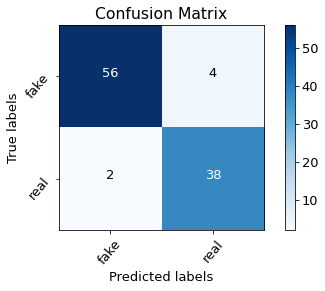

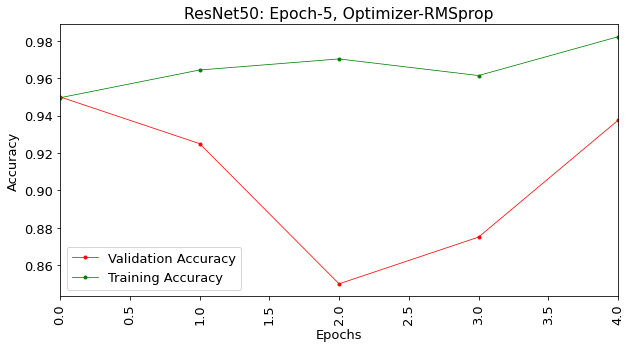

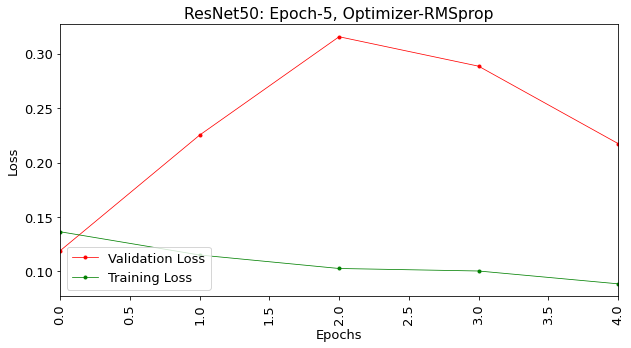

In [66]:
compile_model('RMSprop','sparse_categorical_crossentropy')
history = fit_model_new(5,training_data,validation_data,testing_data,34,20)

#confusion matrix and prediction
prediction= model.predict(x=testing_data,verbose=2)
np.round(prediction)   
cm = confusion_matrix(y_true = testing_data.classes, y_pred = np.argmax(prediction,axis = -1))
cm_plot_labels = ['fake','real']
confusion_matrix_plot(cm = cm, classes = cm_plot_labels, title= 'Confusion Matrix')
print('classification_report:\n',classification_report(testing_data.classes,np.argmax(prediction,axis = -1)))

plot_graph('Accuracy','ResNet50',5,'RMSprop',history.history['val_accuracy'],history.history['accuracy'],'Validation Accuracy','Training Accuracy',0.00,0.000)
plot_graph('Loss',    'ResNet50',5,'RMSprop',history.history['val_loss'],history.history['loss'],'Validation Loss','Training Loss',0.00,0.00)


Epoch 1/15
34/34 - 8s - loss: 0.0945 - accuracy: 0.9703 - val_loss: 0.3078 - val_accuracy: 0.9000
Epoch 2/15
34/34 - 8s - loss: 0.0789 - accuracy: 0.9822 - val_loss: 0.1543 - val_accuracy: 0.9375
Epoch 3/15
34/34 - 8s - loss: 0.0770 - accuracy: 0.9822 - val_loss: 0.1636 - val_accuracy: 0.9250
Epoch 4/15
34/34 - 8s - loss: 0.0644 - accuracy: 0.9881 - val_loss: 0.2950 - val_accuracy: 0.9000
Epoch 5/15
34/34 - 7s - loss: 0.0716 - accuracy: 0.9852 - val_loss: 0.2496 - val_accuracy: 0.8875
Epoch 6/15
34/34 - 8s - loss: 0.0726 - accuracy: 0.9852 - val_loss: 0.1611 - val_accuracy: 0.9250
Epoch 7/15
34/34 - 8s - loss: 0.0534 - accuracy: 0.9941 - val_loss: 0.2023 - val_accuracy: 0.9375
Epoch 8/15
34/34 - 7s - loss: 0.0601 - accuracy: 0.9911 - val_loss: 0.2707 - val_accuracy: 0.9000
Epoch 9/15
34/34 - 7s - loss: 0.0607 - accuracy: 0.9911 - val_loss: 0.2928 - val_accuracy: 0.8875
Epoch 10/15
34/34 - 7s - loss: 0.0541 - accuracy: 0.9941 - val_loss: 0.2671 - val_accuracy: 0.8750
Epoch 11/15
34/34 -

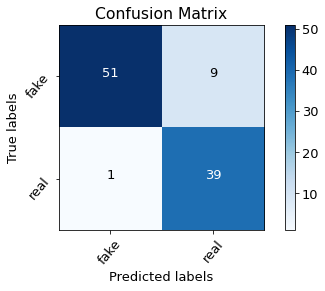

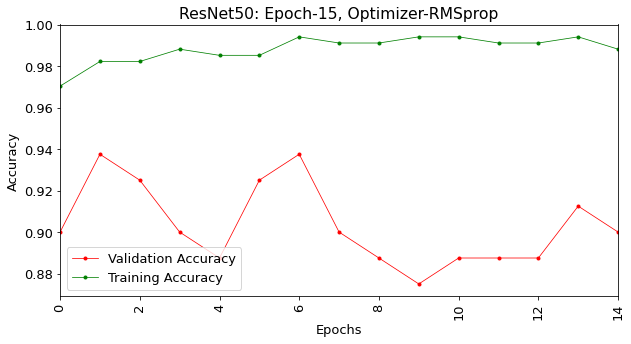

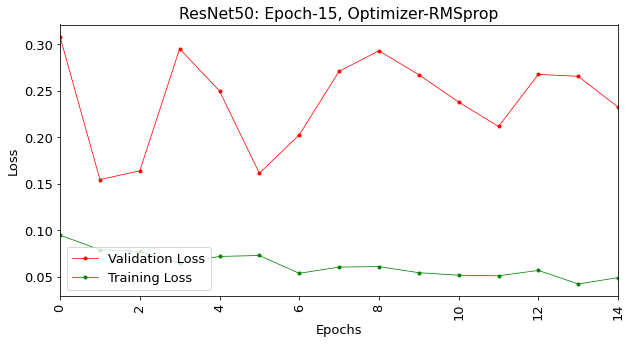

In [67]:
compile_model('RMSprop','sparse_categorical_crossentropy')
history = fit_model_new(15,training_data,validation_data,testing_data,34,20)

#confusion matrix and prediction
prediction= model.predict(x=testing_data,verbose=2)
np.round(prediction)   
cm = confusion_matrix(y_true = testing_data.classes, y_pred = np.argmax(prediction,axis = -1))
cm_plot_labels = ['fake','real']
confusion_matrix_plot(cm = cm, classes = cm_plot_labels, title= 'Confusion Matrix')
print('classification_report:\n',classification_report(testing_data.classes,np.argmax(prediction,axis = -1)))

plot_graph('Accuracy','ResNet50',15,'RMSprop',history.history['val_accuracy'],history.history['accuracy'],'Validation Accuracy','Training Accuracy',0.00,0.000)
plot_graph('Loss',    'ResNet50',15,'RMSprop',history.history['val_loss'],history.history['loss'],'Validation Loss','Training Loss',0.00,0.00)
